In [58]:
import pandas as pd
import sqlite3
import time
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
# plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Tue Sep  1 18:54:33 2020


In [2]:
file1 ="/QuantumRouter/AOD8212020/AOM_64_10kHz_ext_W0028_H07-140105-025044-1.csv"
db = sqlite3.connect("AOM.sqlite")
# Load the csv in chunks:
for chunk in pd.read_csv(file1, chunksize=10000):
    # Append all rows to a new database table, which
    # we name 'master_table_file1':
    chunk.to_sql("master_table_file1", db, if_exists="append")
cursor = db.cursor()
cursor.execute('SELECT * FROM master_table_file1')

for row in cursor.fetchmany(5):
    print(row, type(row[0]), type(row[1]), type(row[2]))
    print (time.ctime())
print (time.ctime())
cursor.close()
db.close()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


(0, 225, 45, 16700489984, 1275, 2475, None) <class 'int'> <class 'int'> <class 'int'>
Tue Aug 18 06:53:21 2020
(1, 226, 45, 16700486144, 1200, 2475, None) <class 'int'> <class 'int'> <class 'int'>
Tue Aug 18 06:53:21 2020
(2, 226, 43, 16700486144, 1025, 1025, None) <class 'int'> <class 'int'> <class 'int'>
Tue Aug 18 06:53:21 2020
(3, 226, 38, 16700486144, 3300, 8550, None) <class 'int'> <class 'int'> <class 'int'>
Tue Aug 18 06:53:21 2020
(4, 226, 37, 16700486144, 2450, 8550, None) <class 'int'> <class 'int'> <class 'int'>
Tue Aug 18 06:53:21 2020
Tue Aug 18 06:53:21 2020


In [3]:
file2 = "/QuantumRouter/AOD8212020/AOM_64n_10kHz_ext_W0028_H07-140105-025447-1.csv"
db = sqlite3.connect("AOM.sqlite")
# Load the csv in chunks:
for chunk in pd.read_csv(file2, chunksize=10000):
    # Append all rows to a new database table, which
    # we name 'master_table_file2':
    chunk.to_sql("master_table_file2", db, if_exists="append")
c = db.cursor()
c.execute('SELECT * FROM master_table_file2')

for row in c.fetchmany(5):
    print(row, type(row[0]), type(row[1]), type(row[2]))
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


(0, 145, 0, 16585124864, 25, 25, None) <class 'int'> <class 'int'> <class 'int'>
Tue Aug 18 06:58:57 2020
(1, 145, 0, 16585340672, 250, 250, None) <class 'int'> <class 'int'> <class 'int'>
Tue Aug 18 06:58:57 2020
(2, 196, 68, 16585405184, 150, 150, None) <class 'int'> <class 'int'> <class 'int'>
Tue Aug 18 06:58:57 2020
(3, 145, 0, 16585634304, 75, 75, None) <class 'int'> <class 'int'> <class 'int'>
Tue Aug 18 06:58:57 2020
(4, 191, 78, 16585713408, 100, 100, None) <class 'int'> <class 'int'> <class 'int'>
Tue Aug 18 06:58:57 2020
Tue Aug 18 06:58:57 2020


In [59]:
GridX1min = 146
GridX1max = 191
GridY1min = 82
GridY1max = 127

GridX2min = 62
GridX2max = 107
GridY2min = 161
GridY2max = 206

In [4]:
# Column Names (0-6): index #Col #Row #ToA #ToT #ToTtotal Unnamed 
GridX1min = 146
GridX1max = 191
GridY1min = 82
GridY1max = 127

# Row_factory block
db = sqlite3.connect("AOM.sqlite")
db.row_factory = sqlite3.Row
cursor = db.cursor()
cursor.execute('SELECT * FROM master_table_file1')
row = cursor.fetchone()
names = row.keys()
print(names)
print(" ")
cursor.close()
db.close()
# Row_factory block


db = sqlite3.connect("AOM.sqlite")
cursor = db.cursor()
cursor.execute('SELECT * FROM master_table_file1')
print(type(cursor.fetchone()[0]),type(cursor.fetchone()[1]),type(cursor.fetchone()[2]),type(cursor.fetchone()[3]))
print(type(cursor.fetchone()[4]),type(cursor.fetchone()[5]),type(cursor.fetchone()[6]))

# cursor.execute("""CREATE TABLE IF NOT EXISTS grid_table('index' INTEGER,
# '#Col' INTEGER,
# '#Row' INTEGER, 
# '#ToA' INTEGER, 
# '#ToT' INTEGER, 
# '#ToTtotal' INTEGER, 
# 'Unnamed' NULL)""")
cursor.execute("""CREATE TABLE IF NOT EXISTS grid_table_file1 AS SELECT * FROM master_table_file1 WHERE 1=2""")
db.commit()
cursor.close()

c = db.cursor()
c.execute("INSERT INTO grid_table_file1 SELECT * FROM master_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (GridX1min, GridX1max))
c.execute("INSERT INTO grid_table_file1 SELECT * FROM master_table_file1 WHERE [#Col] BETWEEN (?) AND (?)", (GridY1min, GridY1max))
db.commit()
c.execute('SELECT * FROM grid_table_file1')
print(" ")
print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

['index', '#Col', '#Row', '#ToA', '#ToT', '#ToTtotal', 'Unnamed: 5']
 
<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(7, 225, 32, 16700489984, 2925, 6900, None)
 
(8, 225, 33, 16700489984, 1450, 6900, None)
Tue Aug 18 07:06:47 2020
(9, 226, 32, 16700486144, 2525, 6900, None)
Tue Aug 18 07:06:47 2020
(10, 225, 22, 16700489984, 4875, 8750, None)
Tue Aug 18 07:06:47 2020
(11, 226, 22, 16700486144, 1725, 8750, None)
Tue Aug 18 07:06:47 2020
(12, 225, 21, 16700489984, 2150, 8750, None)
Tue Aug 18 07:06:47 2020
Tue Aug 18 07:06:47 2020


In [5]:
GridX2min = 62
GridX2max = 107
GridY2min = 161
GridY2max = 206

# Row_factory block
db = sqlite3.connect("AOM.sqlite")
db.row_factory = sqlite3.Row
cursor = db.cursor()
cursor.execute('SELECT * FROM master_table_file2')
row = cursor.fetchone()
names = row.keys()
print(names)
print(" ")
cursor.close()
db.close()
# Row_factory block

db = sqlite3.connect("AOM.sqlite")
cursor = db.cursor()
cursor.execute('SELECT * FROM master_table_file2')
print(type(cursor.fetchone()[0]),type(cursor.fetchone()[1]),type(cursor.fetchone()[2]),type(cursor.fetchone()[3]))
print(type(cursor.fetchone()[4]),type(cursor.fetchone()[5]),type(cursor.fetchone()[6]))
cursor.execute("""CREATE TABLE IF NOT EXISTS grid_table_file2 AS SELECT * FROM master_table_file2 WHERE 1=2""")
db.commit()
cursor.close()

c = db.cursor()
c.execute("INSERT INTO grid_table_file2 SELECT * FROM master_table_file2 WHERE [#Row] BETWEEN (?) AND (?)", (GridX2min, GridX2max))
c.execute("INSERT INTO grid_table_file2 SELECT * FROM master_table_file2 WHERE [#Col] BETWEEN (?) AND (?)", (GridY2min, GridY2max))
db.commit()
c.execute('SELECT * FROM grid_table_file2')
print(" ")
print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

['index', '#Col', '#Row', '#ToA', '#ToT', '#ToTtotal', 'Unnamed: 5']
 
<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(12, 195, 83, 16586159616, 50, 50, None)
 
(13, 179, 62, 16586212352, 225, 225, None)
Tue Aug 18 07:08:45 2020
(14, 195, 62, 16586266368, 300, 300, None)
Tue Aug 18 07:08:45 2020
(15, 190, 73, 16586385664, 775, 775, None)
Tue Aug 18 07:08:45 2020
(16, 195, 62, 16586436608, 50, 50, None)
Tue Aug 18 07:08:45 2020
(17, 168, 62, 16586464256, 725, 725, None)
Tue Aug 18 07:08:45 2020
Tue Aug 18 07:08:45 2020


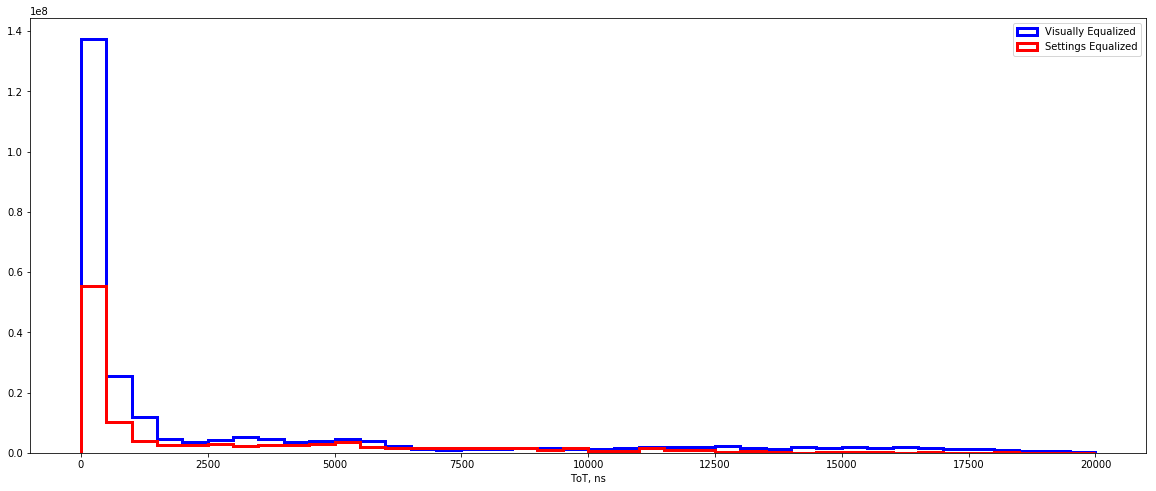

In [6]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
# ToT_grid_file1 = pd.read_sql('SELECT * FROM grid_table_file1', db, columns=['#ToT'])
# print(ToT_grid_file1.shape, time.ctime())
# print(ToT_grid_file1.iloc[:3])

c.execute('SELECT * FROM grid_table_file1')
ToT_grid_file1 = [row[4] for row in c]
# for row in c:
#     ToT_grid_file1.append(row[4])
c.close()

c = db.cursor()

c.execute('SELECT * FROM grid_table_file2')
ToT_grid_file2 = [row[4] for row in c]
# for row in c:
#     ToT_grid_file2.append(row[4])
c.close()
db.close()

fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8))

nbins = 40

plt.hist(ToT_grid_file1, bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'Visually Equalized', color = 'blue')
plt.hist(ToT_grid_file2, bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'Settings Equalized', color = 'red')

plt.xlabel('ToT, ns')
plt.legend()
plt.show()

254981609 <class 'numpy.ndarray'>
254981609 <class 'numpy.ndarray'>
254981609 <class 'numpy.ndarray'>
<class 'numpy.float64'> <class 'numpy.float64'>
<class 'numpy.float64'> <class 'numpy.float64'>
<class 'numpy.float64'> <class 'numpy.float64'>


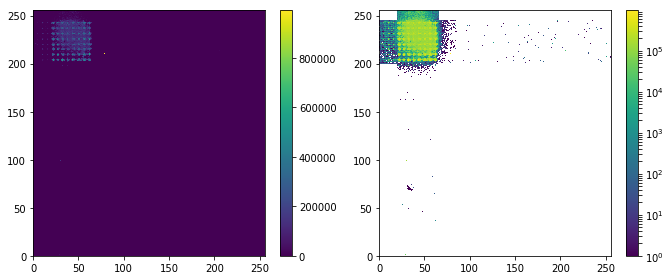

In [61]:
# Column Names (0-6): index #Col #Row #ToA #ToT #ToTtotal Unnamed 
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()

c.execute('SELECT * FROM grid_table_file1')
Col_grid_file1 = np.array([row[1] for row in c], float)
c.execute('SELECT * FROM grid_table_file1')
Row_grid_file1 = np.array([row[2] for row in c], float)
c.execute('SELECT * FROM grid_table_file1')
ToA_grid_file1 = np.array([row[3] for row in c], float)
print(len(Col_grid_file1), type(Col_grid_file1))
print(len(Row_grid_file1), type(Row_grid_file1))
print(len(ToA_grid_file1), type(ToA_grid_file1))
print(type(Col_grid_file1[0]), type(Col_grid_file1[1]))
print(type(Row_grid_file1[0]), type(Row_grid_file1[1]))
print(type(ToA_grid_file1[0]), type(ToA_grid_file1[1]))
# for row in c:
#     Col_grid_file1.append(row[1])
#     Row_grid_file1.append(row[2])
#     ToA_grid_file1.append(row[3])
c.close()
db.close()

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(Row_grid_file1, Col_grid_file1, bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(Row_grid_file1, Col_grid_file1, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()
# 254981609

In [62]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(Row_grid_file1, Col_grid_file1, bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(Row_grid_file1, Col_grid_file1, bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

ValueError: Data has no positive values, and therefore can not be log-scaled.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001B0F6023598> (for post_execute):


ValueError: values must all be positive

ValueError: values must all be positive

<Figure size 684x288 with 4 Axes>

111785171 111785171 111785171


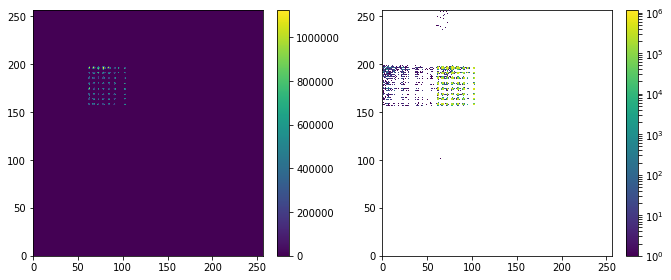

In [9]:
# Column Names (0-6): index #Col #Row #ToA #ToT #ToTtotal Unnamed 
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()

c.execute('SELECT * FROM grid_table_file2')
Col_grid_file2 = np.array([row[1] for row in c], float)
c.execute('SELECT * FROM grid_table_file2')
Row_grid_file2 = np.array([row[2] for row in c], float)
c.execute('SELECT * FROM grid_table_file2')
ToA_grid_file2 = np.array([row[3] for row in c], float)
print(len(Col_grid_file2), len(Row_grid_file2), len(ToA_grid_file2))
# for row in c:
#     Col_grid_file2.append(row[1])
#     Row_grid_file2.append(row[2])
#     ToA_grid_file2.append(row[3])
c.close()
db.close()

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(Row_grid_file2, Col_grid_file2, bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(Row_grid_file2, Col_grid_file2, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

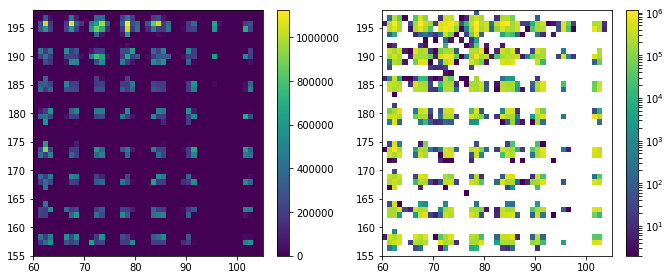

In [10]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(Row_grid_file2, Col_grid_file2, bins = GridX2max-GridX2min, range = [(GridX2min, GridX2max), (GridY2min, GridY2max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(Row_grid_file2, Col_grid_file2, bins = GridX2max-GridX2min, range = [(GridX2min, GridX2max), (GridY2min, GridY2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

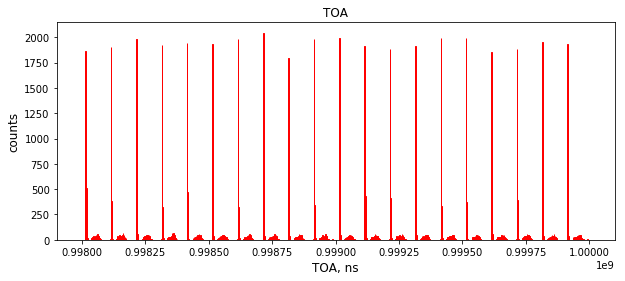

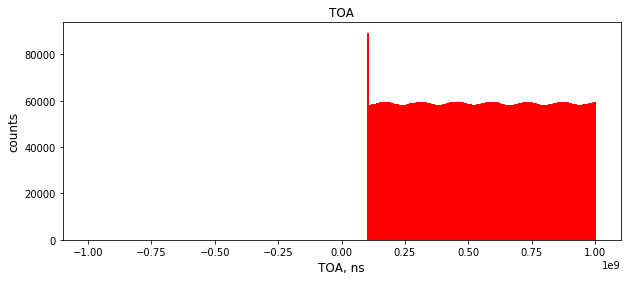

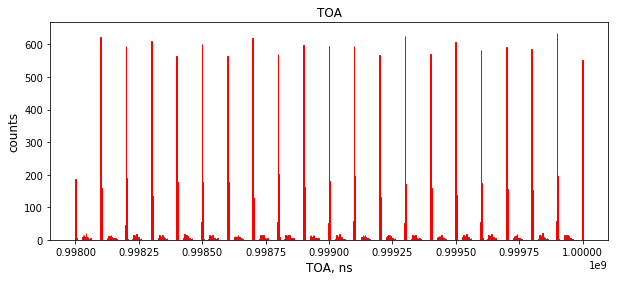

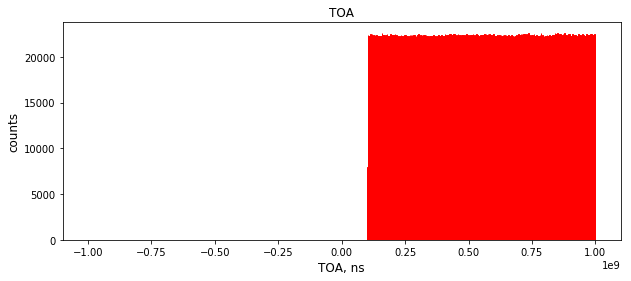

In [11]:

# ToA_grid_file1 = np.array([i/4096.*25. for i in ToA_grid_file1])
# ToA_grid_file2 = np.array([i/4096.*25. for i in ToA_grid_file2])
# print(len(ToA_grid_file1), len(ToA_grid_file2))
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ToA_grid_file1/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(ToA_grid_file1/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ToA_grid_file2/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(ToA_grid_file2/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()


Text(0,0.5,'counts')

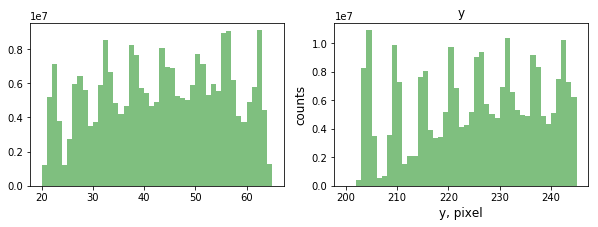

In [74]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 3))

ax0.hist(Row_grid_file1, bins = GridX1max-GridX1min, range = (GridX1min, GridX1max), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("x", fontsize = 12) # change the title
plt.xlabel('x, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

ax1.hist(Col_grid_file1, bins = GridY1max-GridY1min, range = (GridY1min, GridY1max), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("y", fontsize = 12) # change the title
plt.xlabel('y, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

Text(0,0.5,'counts')

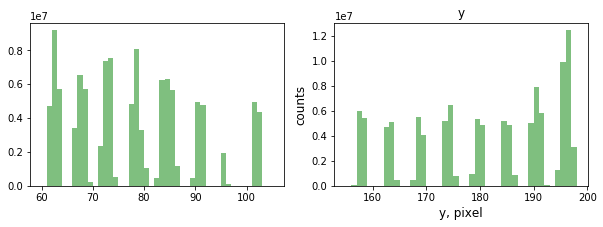

In [75]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 3))

ax0.hist(Row_grid_file2, bins = GridX2max-GridX2min, range = (GridX2min, GridX2max), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("x", fontsize = 12) # change the title
plt.xlabel('x, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

ax1.hist(Col_grid_file2, bins = GridY2max-GridY2min, range = (GridY2min, GridY2max), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("y", fontsize = 12) # change the title
plt.xlabel('y, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

In [35]:
#Define column segregations

C1min = GridX1min; C1max = C1min + 5;
C2min = C1max + 1; C2max = C2min + 4;
C3min = C2max + 1; C3max = C3min + 4;
C4min = C3max + 1; C4max = C4min + 5;
C5min = C4max + 1; C5max = C5min + 5;
C6min = C5max + 1; C6max = C6min + 5;
C7min = C6max + 1; C7max = C7min + 5;
C8min = C7max + 1; C8max = C8min + 5;

#Define Row segregations

R1min = GridY1min; R1max = R1min + 5;
R2min = R1max + 1; R2max = R2min + 4;
R3min = R2max + 1; R3max = R3min + 4;
R4min = R3max + 1; R4max = R4min + 5;
R5min = R4max + 1; R5max = R5min + 5;
R6min = R5max + 1; R6max = R6min + 5;
R7min = R6max + 1; R7max = R7min + 4;
R8min = R7max + 1; R8max = R8min + 5;

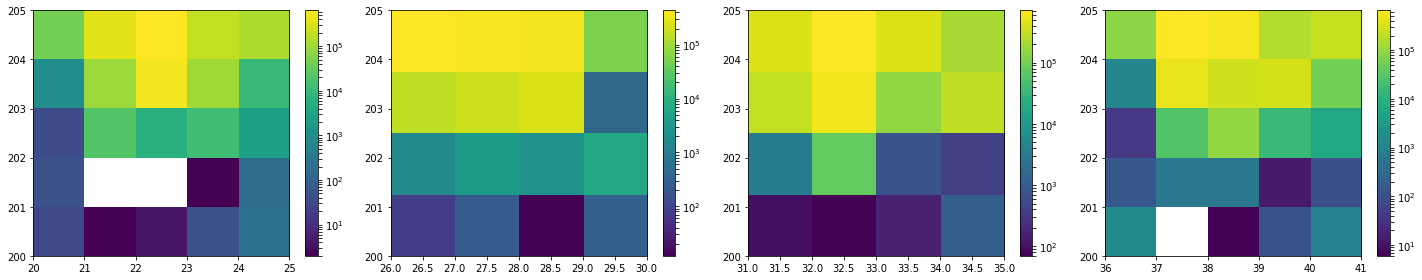

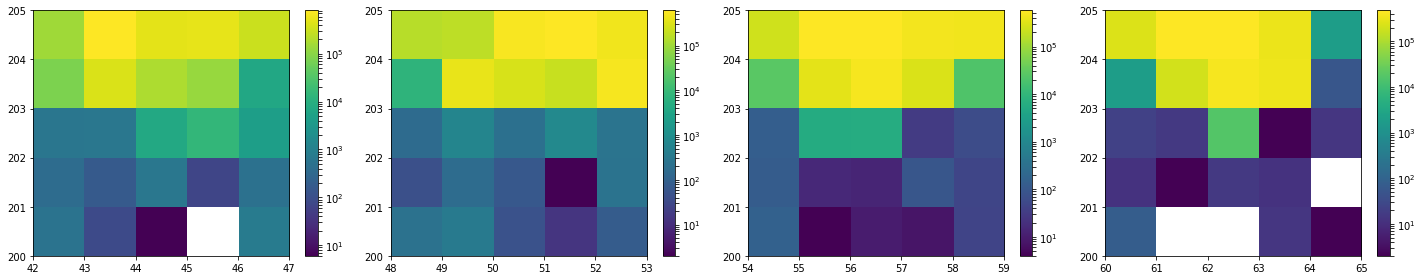

In [15]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(Row_grid_file1, Col_grid_file1, bins = C1max-C1min, range = [(C1min, C1max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(Row_grid_file1, Col_grid_file1, bins = C2max-C2min, range = [(C2min, C2max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(Row_grid_file1, Col_grid_file1, bins = C3max-C3min, range = [(C3min, C3max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(Row_grid_file1, Col_grid_file1, bins = C4max-C4min, range = [(C4min, C4max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(Row_grid_file1, Col_grid_file1, bins = C5max-C5min, range = [(C5min, C5max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(Row_grid_file1, Col_grid_file1, bins = C6max-C6min, range = [(C6min, C6max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(Row_grid_file1, Col_grid_file1, bins = C7max-C7min, range = [(C7min, C7max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(Row_grid_file1, Col_grid_file1, bins = C8max-C8min, range = [(C8min, C8max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [16]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS row1_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO row1_table_file1 SELECT * FROM grid_table_file1 WHERE [#Col] BETWEEN (?) AND (?)", (R1min, R1max))
db.commit()
c.execute('SELECT * FROM row1_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(149, 204, 56, 16700491520, 4475, 7050, None)
 
(150, 204, 57, 16700491520, 75, 7050, None)
Tue Aug 18 08:06:40 2020
(151, 204, 55, 16700491520, 2500, 7050, None)
Tue Aug 18 08:06:40 2020
(152, 204, 44, 16700491520, 450, 5675, None)
Tue Aug 18 08:06:40 2020
(153, 204, 43, 16700491520, 2350, 5675, None)
Tue Aug 18 08:06:40 2020
(154, 204, 45, 16700491520, 2875, 5675, None)
Tue Aug 18 08:06:40 2020
Tue Aug 18 08:06:40 2020


In [28]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM row1_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C1R1_table_file1 AS SELECT * FROM row1_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C1R1_table_file1 SELECT * FROM row1_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C1min, C1max))
db.commit()
# C1R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C1min) & (row1_df["#Col"] < C1max)].index)

# print(C1R1_df.shape, type(C1R1_df.iloc[0,0]), type(C1R1_df.iloc[1,1]), time.ctime())
# print(C1R1_df.iloc[:3])
# rate_C1R1 = len(C1R1_df.index)
c.execute("SELECT * FROM C1R1_table_file1")
rate_C1R1 = len(c.fetchall())
print ('Point 1 Rate (Hz):', rate_C1R1)

c.execute("SELECT * FROM row1_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C2R1_table_file1 AS SELECT * FROM row1_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C2R1_table_file1 SELECT * FROM row1_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C2min, C2max))
db.commit()
# C2R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C2min) & (row1_df["#Col"] < C2max)].index)

# print(C2R1_df.shape, type(C2R1_df.iloc[0,0]), type(C2R1_df.iloc[1,1]), time.ctime())
# print(C2R1_df.iloc[:3])
# rate_C2R1 = len(C2R1_df.index)
c.execute("SELECT * FROM C2R1_table_file1")
rate_C2R1 = len(c.fetchall())
print ('Point 2 Rate (Hz):', rate_C2R1)

c.execute("SELECT * FROM row1_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C3R1_table_file1 AS SELECT * FROM row1_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C3R1_table_file1 SELECT * FROM row1_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C3min, C3max))
db.commit()
# C3R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C3min) & (row1_df["#Col"] < C3max)].index)

# print(C3R1_df.shape, type(C3R1_df.iloc[0,0]), type(C3R1_df.iloc[1,1]), time.ctime())
# print(C3R1_df.iloc[:3])
# rate_C3R1 = len(C3R1_df.index)
c.execute("SELECT * FROM C3R1_table_file1")
rate_C3R1 = len(c.fetchall())
print ('Point 3 Rate (Hz):', rate_C3R1)

c.execute("SELECT * FROM row1_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C4R1_table_file1 AS SELECT * FROM row1_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C4R1_table_file1 SELECT * FROM row1_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C4min, C4max))
db.commit()
# C4R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C4min) & (row1_df["#Col"] < C4max)].index)

# print(C4R1_df.shape, type(C4R1_df.iloc[0,0]), type(C4R1_df.iloc[1,1]), time.ctime())
# print(C4R1_df.iloc[:3])
# rate_C4R1 = len(C4R1_df.index)
c.execute("SELECT * FROM C4R1_table_file1")
rate_C4R1 = len(c.fetchall())
print ('Point 4 Rate (Hz):', rate_C4R1)

c.execute("SELECT * FROM row1_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C5R1_table_file1 AS SELECT * FROM row1_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C5R1_table_file1 SELECT * FROM row1_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C5min, C5max))
db.commit()
# C5R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C5min) & (row1_df["#Col"] < C5max)].index)

# print(C5R1_df.shape, type(C5R1_df.iloc[0,0]), type(C5R1_df.iloc[1,1]), time.ctime())
# print(C5R1_df.iloc[:3])
# rate_C5R1 = len(C5R1_df.index)
c.execute("SELECT * FROM C4R1_table_file1")
rate_C5R1 = len(c.fetchall())
print ('Point 5 Rate (Hz):', rate_C5R1)

c.execute("SELECT * FROM row1_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C6R1_table_file1 AS SELECT * FROM row1_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C6R1_table_file1 SELECT * FROM row1_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C6min, C6max))
db.commit()
# C6R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C6min) & (row1_df["#Col"] < C6max)].index)

# print(C6R1_df.shape, type(C6R1_df.iloc[0,0]), type(C6R1_df.iloc[1,1]), time.ctime())
# print(C6R1_df.iloc[:3])
# rate_C6R1 = len(C6R1_df.index)
c.execute("SELECT * FROM C6R1_table_file1")
rate_C6R1 = len(c.fetchall())
print ('Point 6 Rate (Hz):', rate_C6R1)

c.execute("SELECT * FROM row1_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C7R1_table_file1 AS SELECT * FROM row1_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C7R1_table_file1 SELECT * FROM row1_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C7min, C7max))
db.commit()
# C7R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C7min) & (row1_df["#Col"] < C7max)].index)

# print(C7R1_df.shape, type(C7R1_df.iloc[0,0]), type(C7R1_df.iloc[1,1]), time.ctime())
# print(C7R1_df.iloc[:3])
# rate_C7R1 = len(C7R1_df.index)
c.execute("SELECT * FROM C7R1_table_file1")
rate_C7R1 = len(c.fetchall())
print ('Point 7 Rate (Hz):', rate_C7R1)

c.execute("SELECT * FROM row1_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C8R1_table_file1 AS SELECT * FROM row1_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C8R1_table_file1 SELECT * FROM row1_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C8min, C8max))
db.commit()
# C8R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C8min) & (row1_df["#Col"] < C8max)].index)

# print(C8R1_df.shape, type(C8R1_df.iloc[0,0]), type(C8R1_df.iloc[1,1]), time.ctime())
# print(C8R1_df.iloc[:3])
# rate_C8R1 = len(C8R1_df.index)
c.execute("SELECT * FROM C8R1_table_file1")
rate_C8R1 = len(c.fetchall())
print ('Point 8 Rate (Hz):', rate_C8R1)
c.close()
db.close()

Point 1 Rate (Hz): 2166486
Point 2 Rate (Hz): 1867064
Point 3 Rate (Hz): 3225286
Point 4 Rate (Hz): 2968750
Point 5 Rate (Hz): 2968750
Point 6 Rate (Hz): 3377164
Point 7 Rate (Hz): 3497124
Point 8 Rate (Hz): 2485938


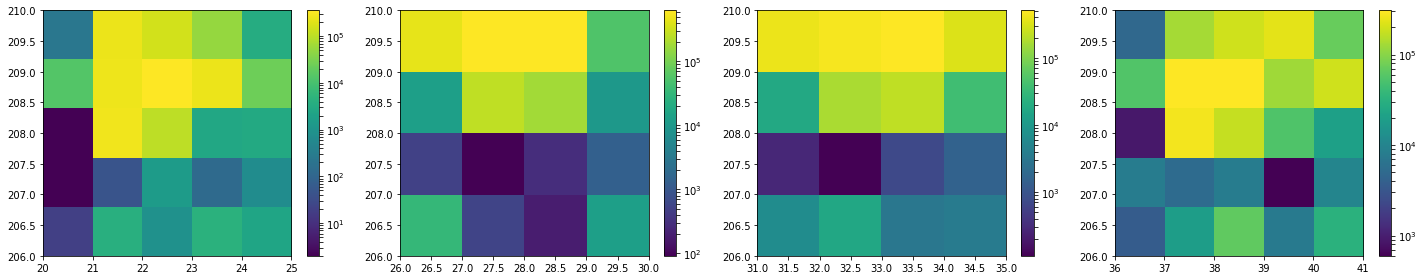

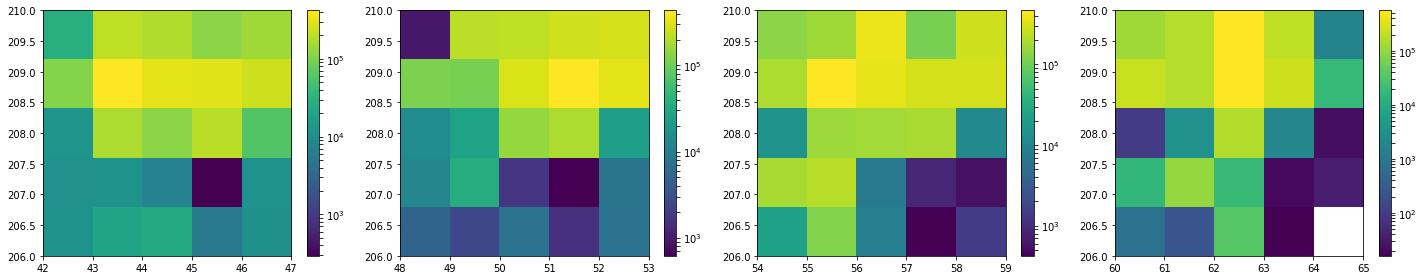

In [18]:
#Display Row 2

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(Row_grid_file1, Col_grid_file1, bins = C1max-C1min, range = [(C1min, C1max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(Row_grid_file1, Col_grid_file1, bins = C2max-C2min, range = [(C2min, C2max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(Row_grid_file1, Col_grid_file1, bins = C3max-C3min, range = [(C3min, C3max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(Row_grid_file1, Col_grid_file1, bins = C4max-C4min, range = [(C4min, C4max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(Row_grid_file1, Col_grid_file1, bins = C5max-C5min, range = [(C5min, C5max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(Row_grid_file1, Col_grid_file1, bins = C6max-C6min, range = [(C6min, C6max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(Row_grid_file1, Col_grid_file1, bins = C7max-C7min, range = [(C7min, C7max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(Row_grid_file1, Col_grid_file1, bins = C8max-C8min, range = [(C8min, C8max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [19]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS row2_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO row2_table_file1 SELECT * FROM grid_table_file1 WHERE [#Col] BETWEEN (?) AND (?)", (R2min, R2max))
db.commit()
c.execute('SELECT * FROM row2_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(80, 209, 37, 16700487936, 1325, 3675, None)
 
(85, 209, 32, 16700487936, 2350, 4475, None)
Tue Aug 18 08:13:01 2020
(86, 209, 33, 16700487936, 2125, 4475, None)
Tue Aug 18 08:13:01 2020
(89, 209, 27, 16700487936, 2625, 2625, None)
Tue Aug 18 08:13:01 2020
(93, 209, 22, 16700487936, 5125, 6475, None)
Tue Aug 18 08:13:01 2020
(94, 209, 21, 16700487936, 1350, 6475, None)
Tue Aug 18 08:13:01 2020
Tue Aug 18 08:13:01 2020


In [29]:
# C1R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C1min) & (row2_df["#Col"] < C1max)].index)

# print(C1R2_df.shape, type(C1R2_df.iloc[0,0]), type(C1R2_df.iloc[1,1]), time.ctime())
# print(C1R2_df.iloc[:3])
# rate_C1R2 = len(C1R2_df.index)
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM row2_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C1R2_table_file1 AS SELECT * FROM row2_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C1R2_table_file1 SELECT * FROM row2_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C1min, C1max))
db.commit()
c.execute("SELECT * FROM C1R2_table_file1")
rate_C1R2 = len(c.fetchall())
print ('Point 1 Rate (Hz):', rate_C1R2)


# C2R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C2min) & (row2_df["#Col"] < C2max)].index)

# print(C2R2_df.shape, type(C2R2_df.iloc[0,0]), type(C2R2_df.iloc[1,1]), time.ctime())
# print(C2R2_df.iloc[:3])
# rate_C2R2 = len(C2R2_df.index)
c.execute("SELECT * FROM row2_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C2R2_table_file1 AS SELECT * FROM row2_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C2R2_table_file1 SELECT * FROM row2_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C2min, C2max))
db.commit()
c.execute("SELECT * FROM C2R2_table_file1")
rate_C2R2 = len(c.fetchall())
print ('Point 2 Rate (Hz):', rate_C2R2)

# C3R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C3min) & (row2_df["#Col"] < C3max)].index)

# print(C3R2_df.shape, type(C3R2_df.iloc[0,0]), type(C3R2_df.iloc[1,1]), time.ctime())
# print(C3R2_df.iloc[:3])
# rate_C3R2 = len(C3R2_df.index)
c.execute("SELECT * FROM row2_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C3R2_table_file1 AS SELECT * FROM row2_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C3R2_table_file1 SELECT * FROM row2_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C3min, C3max))
db.commit()
c.execute("SELECT * FROM C3R2_table_file1")
rate_C3R2 = len(c.fetchall())
print ('Point 3 Rate (Hz):', rate_C3R2)

# C4R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C4min) & (row2_df["#Col"] < C4max)].index)

# print(C4R2_df.shape, type(C4R2_df.iloc[0,0]), type(C4R2_df.iloc[1,1]), time.ctime())
# print(C4R2_df.iloc[:3])
# rate_C4R2 = len(C4R2_df.index)
c.execute("SELECT * FROM row2_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C4R2_table_file1 AS SELECT * FROM row2_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C4R2_table_file1 SELECT * FROM row2_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C4min, C4max))
db.commit()
c.execute("SELECT * FROM C4R2_table_file1")
rate_C4R2 = len(c.fetchall())
print ('Point 4 Rate (Hz):', rate_C4R2)

# C5R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C5min) & (row2_df["#Col"] < C5max)].index)

# print(C5R2_df.shape, type(C5R2_df.iloc[0,0]), type(C5R2_df.iloc[1,1]), time.ctime())
# print(C5R2_df.iloc[:3])
# rate_C5R2 = len(C5R2_df.index)
c.execute("SELECT * FROM row2_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C5R2_table_file1 AS SELECT * FROM row2_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C5R2_table_file1 SELECT * FROM row2_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C5min, C5max))
db.commit()
c.execute("SELECT * FROM C5R2_table_file1")
rate_C5R2 = len(c.fetchall())
print ('Point 5 Rate (Hz):', rate_C5R2)

# C6R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C6min) & (row2_df["#Col"] < C6max)].index)

# print(C6R2_df.shape, type(C6R2_df.iloc[0,0]), type(C6R2_df.iloc[1,1]), time.ctime())
# print(C6R2_df.iloc[:3])
# rate_C6R2 = len(C6R2_df.index)
c.execute("SELECT * FROM row2_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C6R2_table_file1 AS SELECT * FROM row2_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C6R2_table_file1 SELECT * FROM row2_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C6min, C6max))
db.commit()
c.execute("SELECT * FROM C6R2_table_file1")
rate_C6R2 = len(c.fetchall())
print ('Point 6 Rate (Hz):', rate_C6R2)

# C7R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C7min) & (row2_df["#Col"] < C7max)].index)

# print(C7R2_df.shape, type(C7R2_df.iloc[0,0]), type(C7R2_df.iloc[1,1]), time.ctime())
# print(C7R2_df.iloc[:3])
# rate_C7R2 = len(C7R2_df.index)
c.execute("SELECT * FROM row2_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C7R2_table_file1 AS SELECT * FROM row2_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C7R2_table_file1 SELECT * FROM row2_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C7min, C7max))
db.commit()
c.execute("SELECT * FROM C7R2_table_file1")
rate_C7R2 = len(c.fetchall())
print ('Point 7 Rate (Hz):', rate_C7R2)

# C8R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C8min) & (row2_df["#Col"] < C8max)].index)

# print(C8R2_df.shape, type(C8R2_df.iloc[0,0]), type(C8R2_df.iloc[1,1]), time.ctime())
# print(C8R2_df.iloc[:3])
# rate_C8R2 = len(C8R2_df.index)
c.execute("SELECT * FROM row2_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C8R2_table_file1 AS SELECT * FROM row2_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C8R2_table_file1 SELECT * FROM row2_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C8min, C8max))
db.commit()
c.execute("SELECT * FROM C8R2_table_file1")
rate_C8R2 = len(c.fetchall())
print ('Point 8 Rate (Hz):', rate_C8R2)
c.close()
db.close()

Point 1 Rate (Hz): 1786856
Point 2 Rate (Hz): 2275628
Point 3 Rate (Hz): 2179962
Point 4 Rate (Hz): 2331178
Point 5 Rate (Hz): 2749654
Point 6 Rate (Hz): 2815148
Point 7 Rate (Hz): 3836858
Point 8 Rate (Hz): 2645442


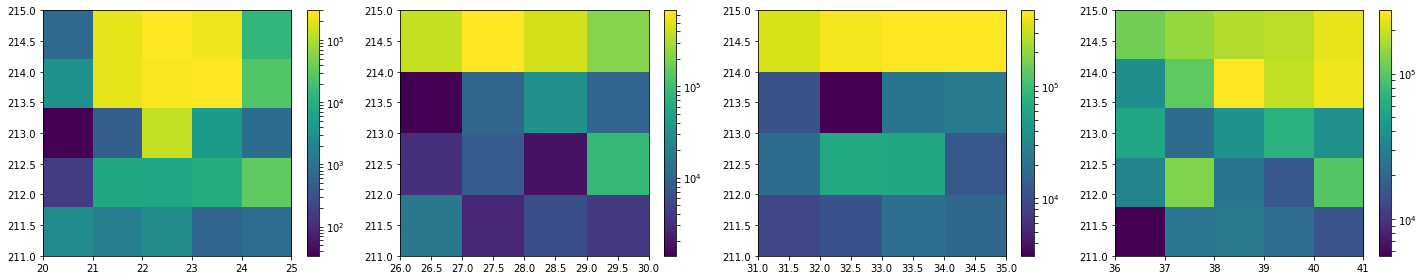

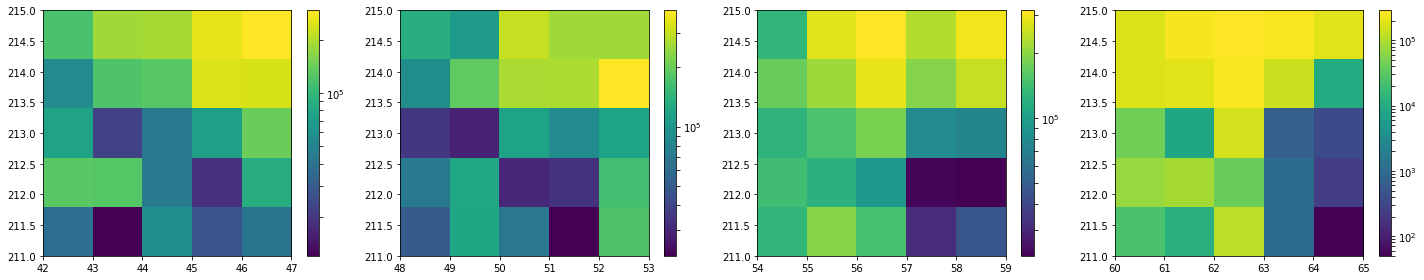

In [30]:
#Display Row 3

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(Row_grid_file1, Col_grid_file1, bins = C1max-C1min, range = [(C1min, C1max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(Row_grid_file1, Col_grid_file1, bins = C2max-C2min, range = [(C2min, C2max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(Row_grid_file1, Col_grid_file1, bins = C3max-C3min, range = [(C3min, C3max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(Row_grid_file1, Col_grid_file1, bins = C4max-C4min, range = [(C4min, C4max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(Row_grid_file1, Col_grid_file1, bins = C5max-C5min, range = [(C5min, C5max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(Row_grid_file1, Col_grid_file1, bins = C6max-C6min, range = [(C6min, C6max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(Row_grid_file1, Col_grid_file1, bins = C7max-C7min, range = [(C7min, C7max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(Row_grid_file1, Col_grid_file1, bins = C8max-C8min, range = [(C8min, C8max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [31]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS row3_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO row3_table_file1 SELECT * FROM grid_table_file1 WHERE [#Col] BETWEEN (?) AND (?)", (R3min, R3max))
db.commit()
c.execute('SELECT * FROM row3_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(115, 215, 51, 16700488704, 3975, 10425, None)
 
(116, 215, 45, 16700488704, 2300, 2300, None)
Thu Aug 20 16:10:55 2020
(117, 215, 27, 16700488704, 725, 725, None)
Thu Aug 20 16:10:55 2020
(118, 214, 22, 16700488704, 3900, 6725, None)
Thu Aug 20 16:10:55 2020
(119, 215, 21, 16700488704, 50, 6725, None)
Thu Aug 20 16:10:55 2020
(120, 215, 22, 16700488704, 2775, 6725, None)
Thu Aug 20 16:10:55 2020
Thu Aug 20 16:10:55 2020


In [37]:
# db = sqlite3.connect("AOM.sqlite")
# c = db.cursor()
# c.execute("DROP TABLE C3R3_table_file1")
# db.commit()
# c.close()
# db.close()

In [38]:
# C1R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C1min) & (row3_df["#Col"] < C1max)].index)

# print(C1R3_df.shape, type(C1R3_df.iloc[0,0]), type(C1R3_df.iloc[1,1]), time.ctime())
# print(C1R3_df.iloc[:3])
# rate_C1R3 = len(C1R3_df.index)
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM row3_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C1R3_table_file1 AS SELECT * FROM row3_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C1R3_table_file1 SELECT * FROM row3_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C1min, C1max))
db.commit()
c.execute("SELECT * FROM C1R3_table_file1")
rate_C1R3 = len(c.fetchall())
print ('Point 1 Rate (Hz):', rate_C1R3)

# C2R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C2min) & (row3_df["#Col"] < C2max)].index)

# print(C2R3_df.shape, type(C2R3_df.iloc[0,0]), type(C2R3_df.iloc[1,1]), time.ctime())
# print(C2R3_df.iloc[:3])
# rate_C2R3 = len(C2R3_df.index)
c.execute("SELECT * FROM row3_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C2R3_table_file1 AS SELECT * FROM row3_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C2R3_table_file1 SELECT * FROM row3_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C2min, C2max))
db.commit()
c.execute("SELECT * FROM C2R3_table_file1")
rate_C2R3 = len(c.fetchall())
print ('Point 2 Rate (Hz):', rate_C2R3)

# C3R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C3min) & (row3_df["#Col"] < C3max)].index)

# print(C3R3_df.shape, type(C3R3_df.iloc[0,0]), type(C3R3_df.iloc[1,1]), time.ctime())
# print(C3R3_df.iloc[:3])
# rate_C3R3 = len(C3R3_df.index)
c.execute("SELECT * FROM row3_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C3R3_table_file1 AS SELECT * FROM row3_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C3R3_table_file1 SELECT * FROM row3_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C3min, C3max))
db.commit()
c.execute("SELECT * FROM C3R3_table_file1")
rate_C3R3 = len(c.fetchall())
print ('Point 3 Rate (Hz):', rate_C3R3)

# C4R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C4min) & (row3_df["#Col"] < C4max)].index)

# print(C4R3_df.shape, type(C4R3_df.iloc[0,0]), type(C4R3_df.iloc[1,1]), time.ctime())
# print(C4R3_df.iloc[:3])
# rate_C4R3 = len(C4R3_df.index)
c.execute("SELECT * FROM row3_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C4R3_table_file1 AS SELECT * FROM row3_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C4R3_table_file1 SELECT * FROM row3_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C4min, C4max))
db.commit()
c.execute("SELECT * FROM C4R3_table_file1")
rate_C4R3 = len(c.fetchall())
print ('Point 4 Rate (Hz):', rate_C4R3)

# C5R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C5min) & (row3_df["#Col"] < C5max)].index)

# print(C5R3_df.shape, type(C5R3_df.iloc[0,0]), type(C5R3_df.iloc[1,1]), time.ctime())
# print(C5R3_df.iloc[:3])
# rate_C5R3 = len(C5R3_df.index)
c.execute("SELECT * FROM row3_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C5R3_table_file1 AS SELECT * FROM row3_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C5R3_table_file1 SELECT * FROM row3_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C5min, C5max))
db.commit()
c.execute("SELECT * FROM C5R3_table_file1")
rate_C5R3 = len(c.fetchall())
print ('Point 5 Rate (Hz):', rate_C5R3)

# C6R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C6min) & (row3_df["#Col"] < C6max)].index)

# print(C6R3_df.shape, type(C6R3_df.iloc[0,0]), type(C6R3_df.iloc[1,1]), time.ctime())
# print(C6R3_df.iloc[:3])
# rate_C6R3 = len(C6R3_df.index)
c.execute("SELECT * FROM row3_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C6R3_table_file1 AS SELECT * FROM row3_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C6R3_table_file1 SELECT * FROM row3_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C6min, C6max))
db.commit()
c.execute("SELECT * FROM C5R3_table_file1")
rate_C6R3 = len(c.fetchall())
print ('Point 6 Rate (Hz):', rate_C6R3)

# C7R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C7min) & (row3_df["#Col"] < C7max)].index)

# print(C7R3_df.shape, type(C7R3_df.iloc[0,0]), type(C7R3_df.iloc[1,1]), time.ctime())
# print(C7R3_df.iloc[:3]
# rate_C7R3 = len(C7R3_df.index)
c.execute("SELECT * FROM row3_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C7R3_table_file1 AS SELECT * FROM row3_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C7R3_table_file1 SELECT * FROM row3_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C7min, C7max))
db.commit()
c.execute("SELECT * FROM C7R3_table_file1")
rate_C7R3 = len(c.fetchall())
print ('Point 7 Rate (Hz):', rate_C7R3)

# C8R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C8min) & (row3_df["#Col"] < C8max)].index)

# print(C8R3_df.shape, type(C8R3_df.iloc[0,0]), type(C8R3_df.iloc[1,1]), time.ctime())
# print(C8R3_df.iloc[:3])
# rate_C8R3 = len(C8R3_df.index)
c.execute("SELECT * FROM row3_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C8R3_table_file1 AS SELECT * FROM row3_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C8R3_table_file1 SELECT * FROM row3_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C8min, C8max))
db.commit()
c.execute("SELECT * FROM C8R3_table_file1")
rate_C8R3 = len(c.fetchall())
print ('Point 8 Rate (Hz):', rate_C8R3)
c.close()
db.close()

Point 1 Rate (Hz): 3600460
Point 2 Rate (Hz): 3879772
Point 3 Rate (Hz): 4010296
Point 4 Rate (Hz): 4681160
Point 5 Rate (Hz): 5578764
Point 6 Rate (Hz): 5578764
Point 7 Rate (Hz): 7925744
Point 8 Rate (Hz): 5099684


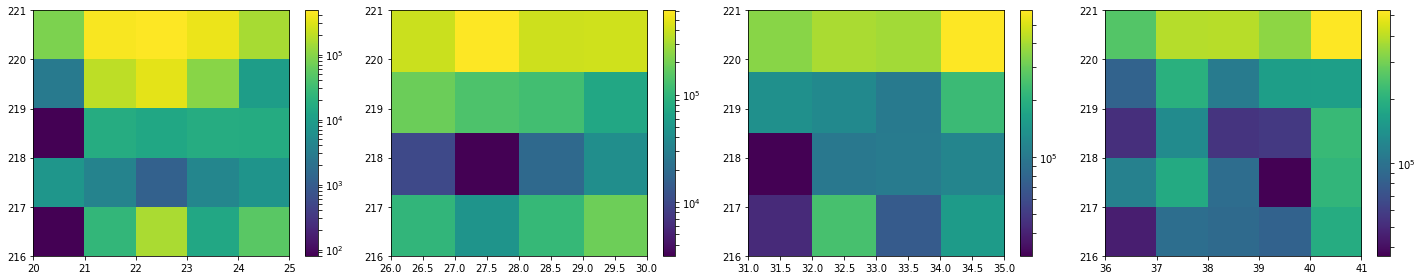

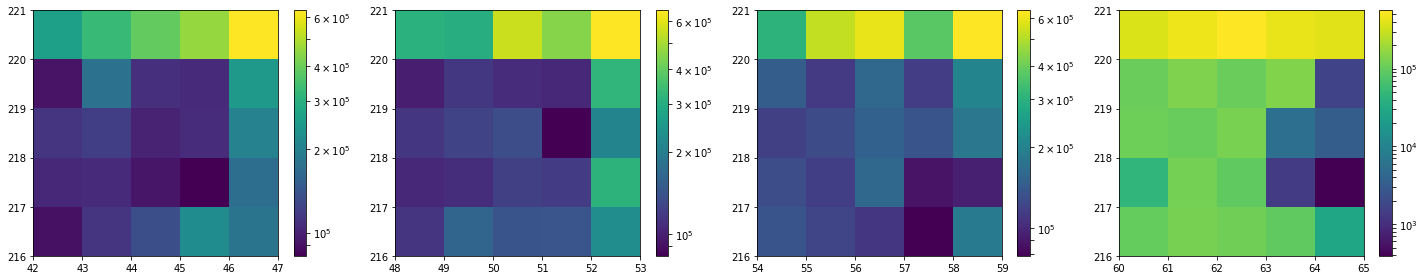

In [39]:
#Display Row 4

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(Row_grid_file1, Col_grid_file1, bins = C1max-C1min, range = [(C1min, C1max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(Row_grid_file1, Col_grid_file1, bins = C2max-C2min, range = [(C2min, C2max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(Row_grid_file1, Col_grid_file1, bins = C3max-C3min, range = [(C3min, C3max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(Row_grid_file1, Col_grid_file1, bins = C4max-C4min, range = [(C4min, C4max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(Row_grid_file1, Col_grid_file1, bins = C5max-C5min, range = [(C5min, C5max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(Row_grid_file1, Col_grid_file1, bins = C6max-C6min, range = [(C6min, C6max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(Row_grid_file1, Col_grid_file1, bins = C7max-C7min, range = [(C7min, C7max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(Row_grid_file1, Col_grid_file1, bins = C8max-C8min, range = [(C8min, C8max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [40]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS row4_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO row4_table_file1 SELECT * FROM grid_table_file1 WHERE [#Col] BETWEEN (?) AND (?)", (R4min, R4max))
db.commit()
c.execute('SELECT * FROM row4_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(130, 220, 45, 16700489472, 2900, 3325, None)
 
(131, 220, 44, 16700489472, 425, 3325, None)
Thu Aug 20 16:43:41 2020
(132, 220, 38, 16700489472, 2275, 2275, None)
Thu Aug 20 16:43:41 2020
(133, 220, 33, 16700489472, 2625, 3375, None)
Thu Aug 20 16:43:41 2020
(134, 220, 32, 16700489472, 750, 3375, None)
Thu Aug 20 16:43:41 2020
(135, 220, 28, 16700489472, 2625, 4900, None)
Thu Aug 20 16:43:41 2020
Thu Aug 20 16:43:41 2020


In [44]:
# db = sqlite3.connect("AOM.sqlite")
# c = db.cursor()
# c.execute("DROP TABLE C1R4_table_file1")
# db.commit()
# c.execute("DROP TABLE C2R4_table_file1")
# db.commit()
# c.execute("DROP TABLE C3R4_table_file1")
# db.commit()

# c.close()
# db.close()

OperationalError: no such table: C1R4_table_file1

In [45]:
# C1R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C1min) & (row4_df["#Col"] < C1max)].index)

# print(C1R4_df.shape, type(C1R4_df.iloc[0,0]), type(C1R4_df.iloc[1,1]), time.ctime())
# print(C1R4_df.iloc[:3])
# rate_C1R4 = len(C1R4_df.index)
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM row4_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C1R4_table_file1 AS SELECT * FROM row4_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C1R4_table_file1 SELECT * FROM row4_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C1min, C1max))
db.commit()
c.execute("SELECT * FROM C1R4_table_file1")
rate_C1R4 = len(c.fetchall())
print ('Point 1 Rate (Hz):', rate_C1R4)

# C2R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C2min) & (row4_df["#Col"] < C2max)].index)

# print(C2R4_df.shape, type(C2R4_df.iloc[0,0]), type(C2R4_df.iloc[1,1]), time.ctime())
# print(C2R4_df.iloc[:3])
# rate_C2R4 = len(C2R4_df.index)
c.execute("SELECT * FROM row4_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C2R4_table_file1 AS SELECT * FROM row4_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C2R4_table_file1 SELECT * FROM row4_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C2min, C2max))
db.commit()
c.execute("SELECT * FROM C2R4_table_file1")
rate_C2R4 = len(c.fetchall())
print ('Point 2 Rate (Hz):', rate_C2R4)

# C3R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C3min) & (row4_df["#Col"] < C3max)].index)

# print(C3R4_df.shape, type(C3R4_df.iloc[0,0]), type(C3R4_df.iloc[1,1]), time.ctime())
# print(C3R4_df.iloc[:3])
# rate_C3R4 = len(C3R4_df.index)
c.execute("SELECT * FROM row4_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C3R4_table_file1 AS SELECT * FROM row4_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C3R4_table_file1 SELECT * FROM row4_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C3min, C3max))
db.commit()
c.execute("SELECT * FROM C3R4_table_file1")
rate_C3R4 = len(c.fetchall())
print ('Point 3 Rate (Hz):', rate_C3R4)

# C4R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C4min) & (row4_df["#Col"] < C4max)].index)

# print(C4R4_df.shape, type(C4R4_df.iloc[0,0]), type(C4R4_df.iloc[1,1]), time.ctime())
# print(C4R4_df.iloc[:3])
# rate_C4R4 = len(C4R4_df.index)
c.execute("SELECT * FROM row4_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C4R4_table_file1 AS SELECT * FROM row4_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C4R4_table_file1 SELECT * FROM row4_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C4min, C4max))
db.commit()
c.execute("SELECT * FROM C4R4_table_file1")
rate_C4R4 = len(c.fetchall())
print ('Point 4 Rate (Hz):', rate_C4R4)

# C5R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C5min) & (row4_df["#Col"] < C5max)].index)

# print(C5R4_df.shape, type(C5R4_df.iloc[0,0]), type(C5R4_df.iloc[1,1]), time.ctime())
# print(C5R4_df.iloc[:3])
# rate_C5R4 = len(C5R4_df.index)
c.execute("SELECT * FROM row4_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C5R4_table_file1 AS SELECT * FROM row4_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C5R4_table_file1 SELECT * FROM row4_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C5min, C5max))
db.commit()
c.execute("SELECT * FROM C5R4_table_file1")
rate_C5R4 = len(c.fetchall())
print ('Point 5 Rate (Hz):', rate_C5R4)

# C6R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C6min) & (row4_df["#Col"] < C6max)].index)

# print(C6R4_df.shape, type(C6R4_df.iloc[0,0]), type(C6R4_df.iloc[1,1]), time.ctime())
# print(C6R4_df.iloc[:3])
# rate_C6R4 = len(C6R4_df.index)
c.execute("SELECT * FROM row4_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C6R4_table_file1 AS SELECT * FROM row4_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C6R4_table_file1 SELECT * FROM row4_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C6min, C6max))
db.commit()
c.execute("SELECT * FROM C6R4_table_file1")
rate_C6R4 = len(c.fetchall())
print ('Point 6 Rate (Hz):', rate_C6R4)

# C7R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C7min) & (row4_df["#Col"] < C7max)].index)

# print(C7R4_df.shape, type(C7R4_df.iloc[0,0]), type(C7R4_df.iloc[1,1]), time.ctime())
# print(C7R4_df.iloc[:3])
# rate_C7R4 = len(C7R4_df.index)
c.execute("SELECT * FROM row4_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C7R4_table_file1 AS SELECT * FROM row4_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C7R4_table_file1 SELECT * FROM row4_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C7min, C7max))
db.commit()
c.execute("SELECT * FROM C7R4_table_file1")
rate_C7R4 = len(c.fetchall())
print ('Point 7 Rate (Hz):', rate_C7R4)

# C8R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C8min) & (row4_df["#Col"] < C8max)].index)

# print(C8R4_df.shape, type(C8R4_df.iloc[0,0]), type(C8R4_df.iloc[1,1]), time.ctime())
# print(C8R4_df.iloc[:3])
# rate_C8R4 = len(C8R4_df.index)
c.execute("SELECT * FROM row4_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C8R4_table_file1 AS SELECT * FROM row4_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C8R4_table_file1 SELECT * FROM row4_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C8min, C8max))
db.commit()
c.execute("SELECT * FROM C8R4_table_file1")
rate_C8R4 = len(c.fetchall())
print ('Point 8 Rate (Hz):', rate_C8R4)
c.close()
db.close()
# Point 1 Rate (Hz): 2512758
# Point 2 Rate (Hz): 2884410
# Point 3 Rate (Hz): 3221268

Point 1 Rate (Hz): 2512758
Point 2 Rate (Hz): 2884410
Point 3 Rate (Hz): 3221268
Point 4 Rate (Hz): 4296202
Point 5 Rate (Hz): 4745732
Point 6 Rate (Hz): 5273102
Point 7 Rate (Hz): 5117854
Point 8 Rate (Hz): 3824200


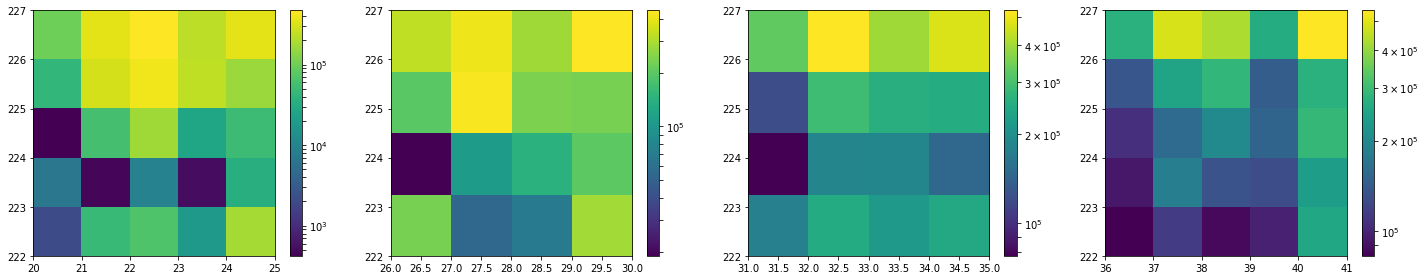

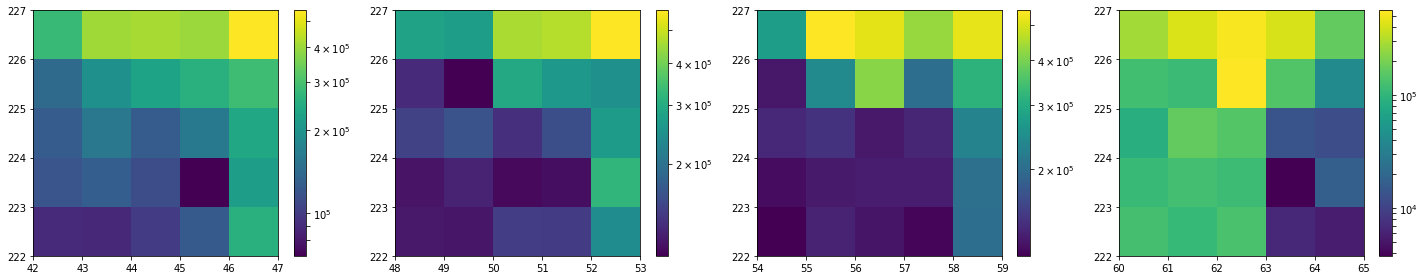

In [46]:
#Display Row 5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(Row_grid_file1, Col_grid_file1, bins = C1max-C1min, range = [(C1min, C1max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(Row_grid_file1, Col_grid_file1, bins = C2max-C2min, range = [(C2min, C2max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(Row_grid_file1, Col_grid_file1, bins = C3max-C3min, range = [(C3min, C3max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(Row_grid_file1, Col_grid_file1, bins = C4max-C4min, range = [(C4min, C4max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(Row_grid_file1, Col_grid_file1, bins = C5max-C5min, range = [(C5min, C5max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(Row_grid_file1, Col_grid_file1, bins = C6max-C6min, range = [(C6min, C6max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(Row_grid_file1, Col_grid_file1, bins = C7max-C7min, range = [(C7min, C7max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(Row_grid_file1, Col_grid_file1, bins = C8max-C8min, range = [(C8min, C8max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [47]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS row5_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO row5_table_file1 SELECT * FROM grid_table_file1 WHERE [#Col] BETWEEN (?) AND (?)", (R5min, R5max))
db.commit()
c.execute('SELECT * FROM row5_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(7, 225, 32, 16700489984, 2925, 6900, None)
 
(8, 225, 33, 16700489984, 1450, 6900, None)
Thu Aug 20 17:01:12 2020
(9, 226, 32, 16700486144, 2525, 6900, None)
Thu Aug 20 17:01:12 2020
(10, 225, 22, 16700489984, 4875, 8750, None)
Thu Aug 20 17:01:12 2020
(11, 226, 22, 16700486144, 1725, 8750, None)
Thu Aug 20 17:01:12 2020
(12, 225, 21, 16700489984, 2150, 8750, None)
Thu Aug 20 17:01:12 2020
Thu Aug 20 17:01:12 2020


In [48]:
# C1R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C1min) & (row5_df["#Col"] < C1max)].index)

# print(C1R5_df.shape, type(C1R5_df.iloc[0,0]), type(C1R5_df.iloc[1,1]), time.ctime())
# print(C1R5_df.iloc[:3])
# rate_C1R5 = len(C1R5_df.index)
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM row5_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C1R5_table_file1 AS SELECT * FROM row5_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C1R5_table_file1 SELECT * FROM row5_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C1min, C1max))
db.commit()
c.execute("SELECT * FROM C1R5_table_file1")
rate_C1R5 = len(c.fetchall())
print ('Point 1 Rate (Hz):', rate_C1R5)

# C2R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C2min) & (row5_df["#Col"] < C2max)].index)

# print(C2R5_df.shape, type(C2R5_df.iloc[0,0]), type(C2R5_df.iloc[1,1]), time.ctime())
# print(C2R5_df.iloc[:3])
# rate_C2R5 = len(C2R5_df.index)
c.execute("SELECT * FROM row5_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C2R5_table_file1 AS SELECT * FROM row5_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C2R5_table_file1 SELECT * FROM row5_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C2min, C2max))
db.commit()
c.execute("SELECT * FROM C2R5_table_file1")
rate_C2R5 = len(c.fetchall())
print ('Point 2 Rate (Hz):', rate_C2R5)

# C3R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C3min) & (row5_df["#Col"] < C3max)].index)

# print(C3R5_df.shape, type(C3R5_df.iloc[0,0]), type(C3R5_df.iloc[1,1]), time.ctime())
# print(C3R5_df.iloc[:3])
# rate_C3R5 = len(C3R5_df.index)
c.execute("SELECT * FROM row5_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C3R5_table_file1 AS SELECT * FROM row5_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C3R5_table_file1 SELECT * FROM row5_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C3min, C3max))
db.commit()
c.execute("SELECT * FROM C3R5_table_file1")
rate_C3R5 = len(c.fetchall())
print ('Point 3 Rate (Hz):', rate_C3R5)

# C4R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C4min) & (row5_df["#Col"] < C4max)].index)

# print(C4R5_df.shape, type(C4R5_df.iloc[0,0]), type(C4R5_df.iloc[1,1]), time.ctime())
# print(C4R5_df.iloc[:3])
# rate_C4R5 = len(C4R5_df.index)
c.execute("SELECT * FROM row5_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C4R5_table_file1 AS SELECT * FROM row5_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C4R5_table_file1 SELECT * FROM row5_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C4min, C4max))
db.commit()
c.execute("SELECT * FROM C4R5_table_file1")
rate_C4R5 = len(c.fetchall())
print ('Point 4 Rate (Hz):', rate_C4R5)

# C5R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C5min) & (row5_df["#Col"] < C5max)].index)

# print(C5R5_df.shape, type(C5R5_df.iloc[0,0]), type(C5R5_df.iloc[1,1]), time.ctime())
# print(C5R5_df.iloc[:3])
# rate_C5R5 = len(C5R5_df.index)
c.execute("SELECT * FROM row5_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C5R5_table_file1 AS SELECT * FROM row5_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C5R5_table_file1 SELECT * FROM row5_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C5min, C5max))
db.commit()
c.execute("SELECT * FROM C5R5_table_file1")
rate_C5R5 = len(c.fetchall())
print ('Point 5 Rate (Hz):', rate_C5R5)

# C6R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C6min) & (row5_df["#Col"] < C6max)].index)

# print(C6R5_df.shape, type(C6R5_df.iloc[0,0]), type(C6R5_df.iloc[1,1]), time.ctime())
# print(C6R5_df.iloc[:3])
# rate_C6R5 = len(C6R5_df.index)
c.execute("SELECT * FROM row5_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C6R5_table_file1 AS SELECT * FROM row5_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C6R5_table_file1 SELECT * FROM row5_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C6min, C6max))
db.commit()
c.execute("SELECT * FROM C6R5_table_file1")
rate_C6R5 = len(c.fetchall())
print ('Point 6 Rate (Hz):', rate_C6R5)

# C7R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C7min) & (row5_df["#Col"] < C7max)].index)

# print(C7R5_df.shape, type(C7R5_df.iloc[0,0]), type(C7R5_df.iloc[1,1]), time.ctime())
# print(C7R5_df.iloc[:3])
# rate_C7R5 = len(C7R5_df.index)
c.execute("SELECT * FROM row5_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C7R5_table_file1 AS SELECT * FROM row5_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C7R5_table_file1 SELECT * FROM row5_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C7min, C7max))
db.commit()
c.execute("SELECT * FROM C7R5_table_file1")
rate_C7R5 = len(c.fetchall())
print ('Point 7 Rate (Hz):', rate_C7R5)

# C8R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C8min) & (row5_df["#Col"] < C8max)].index)

# print(C8R5_df.shape, type(C8R5_df.iloc[0,0]), type(C8R5_df.iloc[1,1]), time.ctime())
# print(C8R5_df.iloc[:3])
# rate_C8R5 = len(C8R5_df.index)
c.execute("SELECT * FROM row5_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C8R5_table_file1 AS SELECT * FROM row5_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C8R5_table_file1 SELECT * FROM row5_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C8min, C8max))
db.commit()
c.execute("SELECT * FROM C8R5_table_file1")
rate_C8R5 = len(c.fetchall())
print ('Point 8 Rate (Hz):', rate_C8R5)
c.close()
db.close()

Point 1 Rate (Hz): 3357472
Point 2 Rate (Hz): 3686378
Point 3 Rate (Hz): 4131076
Point 4 Rate (Hz): 5410186
Point 5 Rate (Hz): 5292728
Point 6 Rate (Hz): 5526812
Point 7 Rate (Hz): 5777868
Point 8 Rate (Hz): 4007902


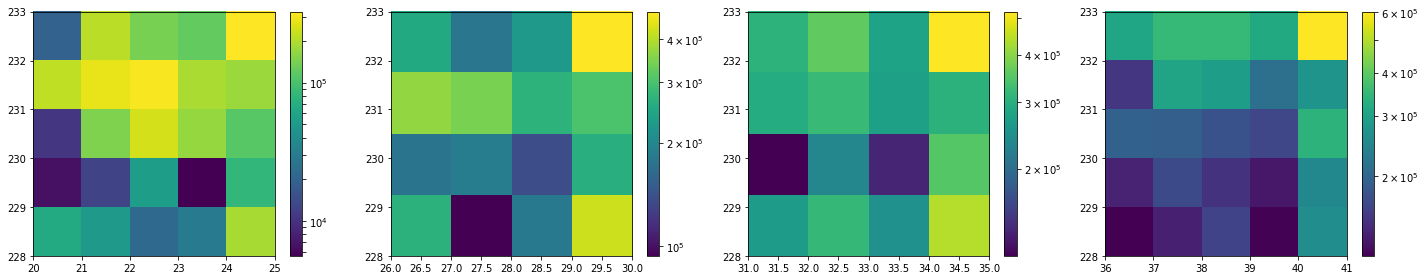

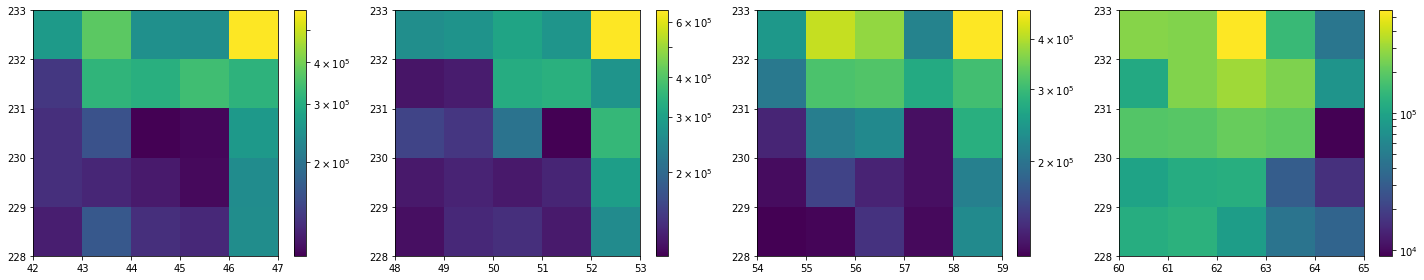

In [49]:
#Display Row 6

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(Row_grid_file1, Col_grid_file1, bins = C1max-C1min, range = [(C1min, C1max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(Row_grid_file1, Col_grid_file1, bins = C2max-C2min, range = [(C2min, C2max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(Row_grid_file1, Col_grid_file1, bins = C3max-C3min, range = [(C3min, C3max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(Row_grid_file1, Col_grid_file1, bins = C4max-C4min, range = [(C4min, C4max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(Row_grid_file1, Col_grid_file1, bins = C5max-C5min, range = [(C5min, C5max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(Row_grid_file1, Col_grid_file1, bins = C6max-C6min, range = [(C6min, C6max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(Row_grid_file1, Col_grid_file1, bins = C7max-C7min, range = [(C7min, C7max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(Row_grid_file1, Col_grid_file1, bins = C8max-C8min, range = [(C8min, C8max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [50]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS row6_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO row6_table_file1 SELECT * FROM grid_table_file1 WHERE [#Col] BETWEEN (?) AND (?)", (R6min, R6max))
db.commit()
c.execute('SELECT * FROM row6_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(30, 231, 27, 16700486656, 4325, 9050, None)
 
(31, 231, 28, 16700486656, 2250, 9050, None)
Thu Aug 20 17:09:57 2020
(32, 231, 26, 16700486656, 2475, 9050, None)
Thu Aug 20 17:09:57 2020
(33, 231, 22, 16700486656, 5700, 8600, None)
Thu Aug 20 17:09:57 2020
(34, 231, 21, 16700486656, 2900, 8600, None)
Thu Aug 20 17:09:57 2020
(35, 231, 51, 16700486656, 5425, 10825, None)
Thu Aug 20 17:09:57 2020
Thu Aug 20 17:09:57 2020


In [51]:
# C1R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C1min) & (row6_df["#Col"] < C1max)].index)

# print(C1R6_df.shape, type(C1R6_df.iloc[0,0]), type(C1R6_df.iloc[1,1]), time.ctime())
# print(C1R6_df.iloc[:3])
# rate_C1R6 = len(C1R6_df.index)
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM row6_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C1R6_table_file1 AS SELECT * FROM row6_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C1R6_table_file1 SELECT * FROM row6_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C1min, C1max))
db.commit()
c.execute("SELECT * FROM C1R6_table_file1")
rate_C1R6 = len(c.fetchall())
print ('Point 1 Rate (Hz):', rate_C1R6)

# C2R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C2min) & (row6_df["#Col"] < C2max)].index)

# print(C2R6_df.shape, type(C2R6_df.iloc[0,0]), type(C2R6_df.iloc[1,1]), time.ctime())
# print(C2R6_df.iloc[:3])
# rate_C2R6 = len(C2R6_df.index)
c.execute("SELECT * FROM row6_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C2R6_table_file1 AS SELECT * FROM row6_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C2R6_table_file1 SELECT * FROM row6_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C2min, C2max))
db.commit()
c.execute("SELECT * FROM C2R6_table_file1")
rate_C2R6 = len(c.fetchall())
print ('Point 2 Rate (Hz):', rate_C2R6)

# C3R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C3min) & (row6_df["#Col"] < C3max)].index)

# print(C3R6_df.shape, type(C3R6_df.iloc[0,0]), type(C3R6_df.iloc[1,1]), time.ctime())
# print(C3R6_df.iloc[:3])
# rate_C3R6 = len(C3R6_df.index)
c.execute("SELECT * FROM row6_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C3R6_table_file1 AS SELECT * FROM row6_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C3R6_table_file1 SELECT * FROM row6_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C3min, C3max))
db.commit()
c.execute("SELECT * FROM C3R6_table_file1")
rate_C3R6 = len(c.fetchall())
print ('Point 3 Rate (Hz):', rate_C3R6)

# C4R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C4min) & (row6_df["#Col"] < C4max)].index)

# print(C4R6_df.shape, type(C4R6_df.iloc[0,0]), type(C4R6_df.iloc[1,1]), time.ctime())
# print(C4R6_df.iloc[:3])
# rate_C4R6 = len(C4R6_df.index)
c.execute("SELECT * FROM row6_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C4R6_table_file1 AS SELECT * FROM row6_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C4R6_table_file1 SELECT * FROM row6_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C4min, C4max))
db.commit()
c.execute("SELECT * FROM C4R6_table_file1")
rate_C4R6 = len(c.fetchall())
print ('Point 4 Rate (Hz):', rate_C4R6)

# C5R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C5min) & (row6_df["#Col"] < C5max)].index)

# print(C5R6_df.shape, type(C5R6_df.iloc[0,0]), type(C5R6_df.iloc[1,1]), time.ctime())
# print(C5R6_df.iloc[:3])
# rate_C5R6 = len(C5R6_df.index)
c.execute("SELECT * FROM row6_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C5R6_table_file1 AS SELECT * FROM row6_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C5R6_table_file1 SELECT * FROM row6_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C5min, C5max))
db.commit()
c.execute("SELECT * FROM C5R6_table_file1")
rate_C5R6 = len(c.fetchall())
print ('Point 5 Rate (Hz):', rate_C5R6)

# C6R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C6min) & (row6_df["#Col"] < C6max)].index)

# print(C6R6_df.shape, type(C6R6_df.iloc[0,0]), type(C6R6_df.iloc[1,1]), time.ctime())
# print(C6R6_df.iloc[:3])
# rate_C6R6 = len(C6R6_df.index)
c.execute("SELECT * FROM row6_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C6R6_table_file1 AS SELECT * FROM row6_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C6R6_table_file1 SELECT * FROM row6_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C6min, C6max))
db.commit()
c.execute("SELECT * FROM C6R6_table_file1")
rate_C6R6 = len(c.fetchall())
print ('Point 6 Rate (Hz):', rate_C6R6)

# C7R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C7min) & (row6_df["#Col"] < C7max)].index)

# print(C7R6_df.shape, type(C7R6_df.iloc[0,0]), type(C7R6_df.iloc[1,1]), time.ctime())
# print(C7R6_df.iloc[:3])
# rate_C7R6 = len(C7R6_df.index)
c.execute("SELECT * FROM row6_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C7R6_table_file1 AS SELECT * FROM row6_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C7R6_table_file1 SELECT * FROM row6_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C7min, C7max))
db.commit()
c.execute("SELECT * FROM C7R6_table_file1")
rate_C7R6 = len(c.fetchall())
print ('Point 7 Rate (Hz):', rate_C7R6)

# C8R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C8min) & (row6_df["#Col"] < C8max)].index)

# print(C8R6_df.shape, type(C8R6_df.iloc[0,0]), type(C8R6_df.iloc[1,1]), time.ctime())
# print(C8R6_df.iloc[:3])
# rate_C8R6 = len(C8R6_df.index)
c.execute("SELECT * FROM row6_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C8R6_table_file1 AS SELECT * FROM row6_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C8R6_table_file1 SELECT * FROM row6_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C8min, C8max))
db.commit()
c.execute("SELECT * FROM C8R6_table_file1")
rate_C8R6 = len(c.fetchall())
print ('Point 8 Rate (Hz):', rate_C8R6)
c.close()
db.close()

Point 1 Rate (Hz): 3227954
Point 2 Rate (Hz): 4161706
Point 3 Rate (Hz): 4776198
Point 4 Rate (Hz): 5857610
Point 5 Rate (Hz): 5386346
Point 6 Rate (Hz): 5514362
Point 7 Rate (Hz): 5599094
Point 8 Rate (Hz): 3892756


AttributeError: 'sqlite3.Cursor' object has no attribute 'colse'

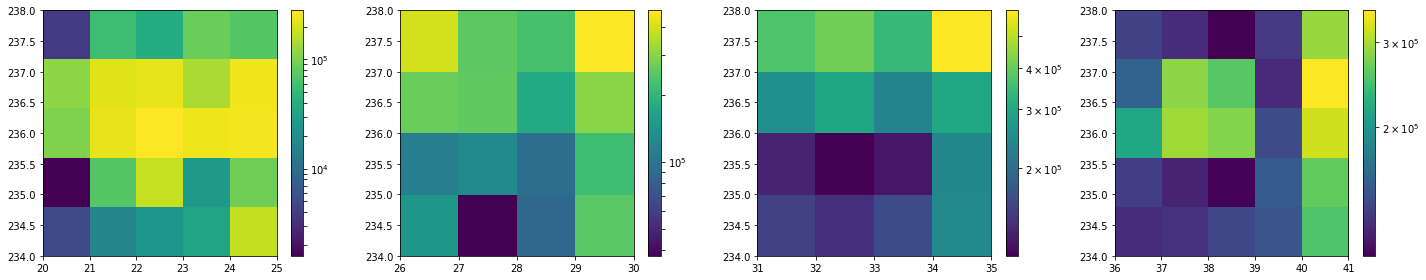

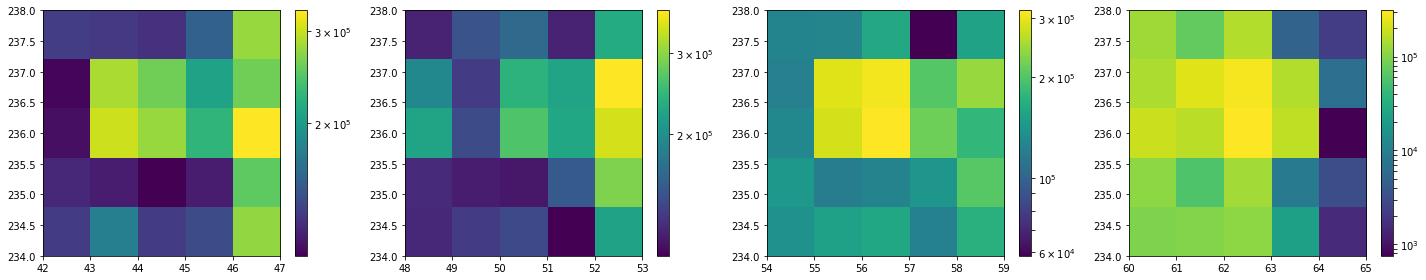

In [52]:
#Display Row 7

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(Row_grid_file1, Col_grid_file1, bins = C1max-C1min, range = [(C1min, C1max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(Row_grid_file1, Col_grid_file1, bins = C2max-C2min, range = [(C2min, C2max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(Row_grid_file1, Col_grid_file1, bins = C3max-C3min, range = [(C3min, C3max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(Row_grid_file1, Col_grid_file1, bins = C4max-C4min, range = [(C4min, C4max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(Row_grid_file1, Col_grid_file1, bins = C5max-C5min, range = [(C5min, C5max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(Row_grid_file1, Col_grid_file1, bins = C6max-C6min, range = [(C6min, C6max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(Row_grid_file1, Col_grid_file1, bins = C7max-C7min, range = [(C7min, C7max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(Row_grid_file1, Col_grid_file1, bins = C8max-C8min, range = [(C8min, C8max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [53]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS row7_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO row7_table_file1 SELECT * FROM grid_table_file1 WHERE [#Col] BETWEEN (?) AND (?)", (R7min, R7max))
db.commit()
c.execute('SELECT * FROM row7_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(52, 237, 32, 16700487424, 4575, 8525, None)
 
(53, 236, 31, 16700487424, 50, 8525, None)
Thu Aug 20 17:25:39 2020
(54, 237, 31, 16700487424, 250, 8525, None)
Thu Aug 20 17:25:39 2020
(55, 236, 32, 16700487424, 3650, 8525, None)
Thu Aug 20 17:25:39 2020
(56, 236, 26, 16700487424, 975, 975, None)
Thu Aug 20 17:25:39 2020
(57, 236, 22, 16700487424, 3000, 3550, None)
Thu Aug 20 17:25:39 2020
Thu Aug 20 17:25:39 2020


In [54]:
# C1R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C1min) & (row7_df["#Col"] < C1max)].index)

# print(C1R7_df.shape, type(C1R7_df.iloc[0,0]), type(C1R7_df.iloc[1,1]), time.ctime())
# print(C1R7_df.iloc[:3])
# rate_C1R7 = len(C1R7_df.index)
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM row7_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C1R7_table_file1 AS SELECT * FROM row7_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C1R7_table_file1 SELECT * FROM row7_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C1min, C1max))
db.commit()
c.execute("SELECT * FROM C1R7_table_file1")
rate_C1R7 = len(c.fetchall())
print ('Point 1 Rate (Hz):', rate_C1R7)

# C2R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C2min) & (row7_df["#Col"] < C2max)].index)

# print(C2R7_df.shape, type(C2R7_df.iloc[0,0]), type(C2R7_df.iloc[1,1]), time.ctime())
# print(C2R7_df.iloc[:3])
# rate_C2R7 = len(C2R7_df.index)
c.execute("SELECT * FROM row7_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C2R7_table_file1 AS SELECT * FROM row7_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C2R7_table_file1 SELECT * FROM row7_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C2min, C2max))
db.commit()
c.execute("SELECT * FROM C2R7_table_file1")
rate_C2R7 = len(c.fetchall())
print ('Point 2 Rate (Hz):', rate_C2R7)

# C3R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C3min) & (row7_df["#Col"] < C3max)].index)

# print(C3R7_df.shape, type(C3R7_df.iloc[0,0]), type(C3R7_df.iloc[1,1]), time.ctime())
# print(C3R7_df.iloc[:3])
# rate_C3R7 = len(C3R7_df.index)
c.execute("SELECT * FROM row7_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C3R7_table_file1 AS SELECT * FROM row7_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C3R7_table_file1 SELECT * FROM row7_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C3min, C3max))
db.commit()
c.execute("SELECT * FROM C3R7_table_file1")
rate_C3R7 = len(c.fetchall())
print ('Point 3 Rate (Hz):', rate_C3R7)

# C4R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C4min) & (row7_df["#Col"] < C4max)].index)

# print(C4R7_df.shape, type(C4R7_df.iloc[0,0]), type(C4R7_df.iloc[1,1]), time.ctime())
# print(C4R7_df.iloc[:3])
# rate_C4R7 = len(C4R7_df.index)
c.execute("SELECT * FROM row7_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C4R7_table_file1 AS SELECT * FROM row7_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C4R7_table_file1 SELECT * FROM row7_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C4min, C4max))
db.commit()
c.execute("SELECT * FROM C4R7_table_file1")
rate_C4R7 = len(c.fetchall())
print ('Point 4 Rate (Hz):', rate_C4R7)

# C5R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C5min) & (row7_df["#Col"] < C5max)].index)

# print(C5R7_df.shape, type(C5R7_df.iloc[0,0]), type(C5R7_df.iloc[1,1]), time.ctime())
# print(C5R7_df.iloc[:3])
# rate_C5R7 = len(C5R7_df.index)
c.execute("SELECT * FROM row7_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C5R7_table_file1 AS SELECT * FROM row7_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C5R7_table_file1 SELECT * FROM row7_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C5min, C5max))
db.commit()
c.execute("SELECT * FROM C5R7_table_file1")
rate_C5R7 = len(c.fetchall())
print ('Point 5 Rate (Hz):', rate_C5R7)

# C6R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C6min) & (row7_df["#Col"] < C6max)].index)

# print(C6R7_df.shape, type(C6R7_df.iloc[0,0]), type(C6R7_df.iloc[1,1]), time.ctime())
# print(C6R7_df.iloc[:3])
# rate_C6R7 = len(C6R7_df.index)
c.execute("SELECT * FROM row7_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C6R7_table_file1 AS SELECT * FROM row7_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C6R7_table_file1 SELECT * FROM row7_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C6min, C6max))
db.commit()
c.execute("SELECT * FROM C6R7_table_file1")
rate_C6R7 = len(c.fetchall())
print ('Point 6 Rate (Hz):', rate_C6R7)

# C7R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C7min) & (row7_df["#Col"] < C7max)].index)

# print(C7R7_df.shape, type(C7R7_df.iloc[0,0]), type(C7R7_df.iloc[1,1]), time.ctime())
# print(C7R7_df.iloc[:3])
# rate_C7R7 = len(C7R7_df.index)
c.execute("SELECT * FROM row7_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C7R7_table_file1 AS SELECT * FROM row7_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C7R7_table_file1 SELECT * FROM row7_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C7min, C7max))
db.commit()
c.execute("SELECT * FROM C7R7_table_file1")
rate_C7R7 = len(c.fetchall())
print ('Point 7 Rate (Hz):', rate_C7R7)

# C8R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C8min) & (row7_df["#Col"] < C8max)].index)

# print(C8R7_df.shape, type(C8R7_df.iloc[0,0]), type(C8R7_df.iloc[1,1]), time.ctime())
# print(C8R7_df.iloc[:3])
# rate_C8R7 = len(C8R7_df.index)
c.execute("SELECT * FROM row7_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C8R7_table_file1 AS SELECT * FROM row7_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C8R7_table_file1 SELECT * FROM row7_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C8min, C8max))
db.commit()
c.execute("SELECT * FROM C8R7_table_file1")
rate_C8R7 = len(c.fetchall())
print ('Point 8 Rate (Hz):', rate_C8R7)
c.close()
db.close()

Point 1 Rate (Hz): 2969406
Point 2 Rate (Hz): 3435188
Point 3 Rate (Hz): 4099978
Point 4 Rate (Hz): 4794576
Point 5 Rate (Hz): 4810246
Point 6 Rate (Hz): 4697696
Point 7 Rate (Hz): 4404364
Point 8 Rate (Hz): 2688480


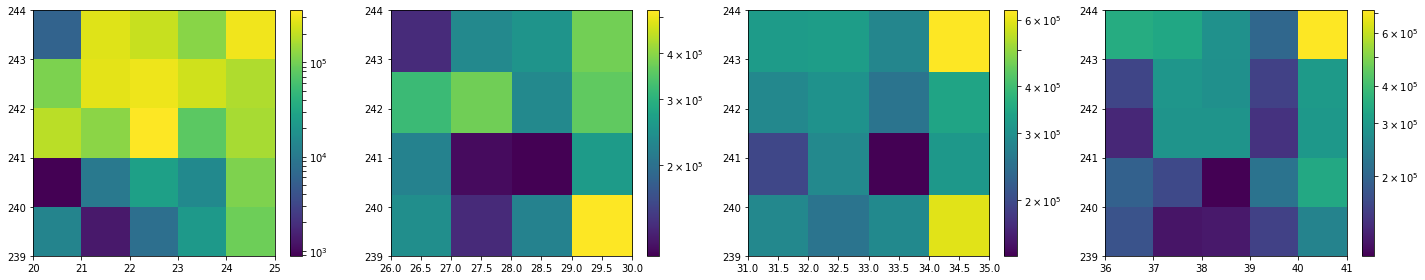

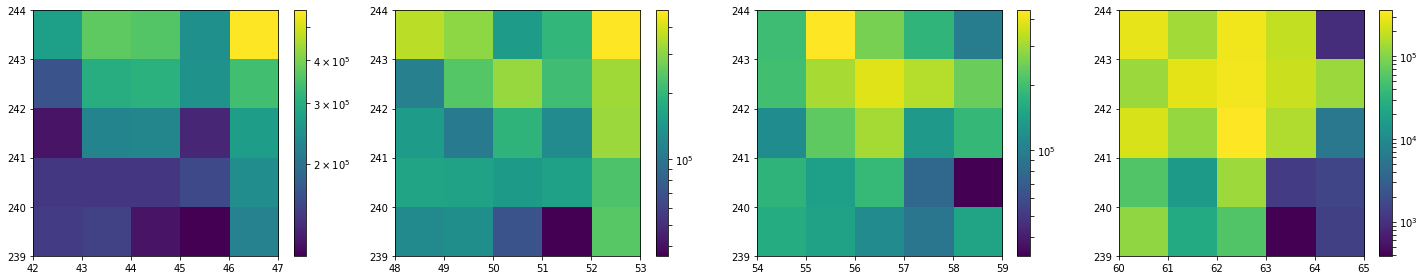

In [55]:
#Display Row 8

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(Row_grid_file1, Col_grid_file1, bins = C1max-C1min, range = [(C1min, C1max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(Row_grid_file1, Col_grid_file1, bins = C2max-C2min, range = [(C2min, C2max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(Row_grid_file1, Col_grid_file1, bins = C3max-C3min, range = [(C3min, C3max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(Row_grid_file1, Col_grid_file1, bins = C4max-C4min, range = [(C4min, C4max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(Row_grid_file1, Col_grid_file1, bins = C5max-C5min, range = [(C5min, C5max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(Row_grid_file1, Col_grid_file1, bins = C6max-C6min, range = [(C6min, C6max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(Row_grid_file1, Col_grid_file1, bins = C7max-C7min, range = [(C7min, C7max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(Row_grid_file1, Col_grid_file1, bins = C8max-C8min, range = [(C8min, C8max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [56]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS row8_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO row8_table_file1 SELECT * FROM grid_table_file1 WHERE [#Col] BETWEEN (?) AND (?)", (R8min, R8max))
db.commit()
c.execute('SELECT * FROM row8_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'int'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(84, 242, 45, 16700488192, 4525, 12250, None)
 
(87, 241, 38, 16700487936, 3425, 6575, None)
Thu Aug 20 17:34:24 2020
(88, 241, 37, 16700487936, 3150, 6575, None)
Thu Aug 20 17:34:24 2020
(90, 242, 31, 16700488192, 4800, 10325, None)
Thu Aug 20 17:34:24 2020
(91, 242, 33, 16700488192, 2750, 10325, None)
Thu Aug 20 17:34:24 2020
(92, 241, 32, 16700487936, 2775, 10325, None)
Thu Aug 20 17:34:24 2020
Thu Aug 20 17:34:24 2020


In [57]:
# C1R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C1min) & (row8_df["#Col"] < C1max)].index)

# print(C1R8_df.shape, type(C1R8_df.iloc[0,0]), type(C1R8_df.iloc[1,1]), time.ctime())
# print(C1R8_df.iloc[:3])
# rate_C1R8 = len(C1R8_df.index)
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM row8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C1R8_table_file1 AS SELECT * FROM row8_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C1R8_table_file1 SELECT * FROM row8_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C1min, C1max))
db.commit()
c.execute("SELECT * FROM C1R8_table_file1")
rate_C1R8 = len(c.fetchall())
print ('Point 1 Rate (Hz):', rate_C1R8)

# C2R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C2min) & (row8_df["#Col"] < C2max)].index)

# print(C2R8_df.shape, type(C2R8_df.iloc[0,0]), type(C2R8_df.iloc[1,1]), time.ctime())
# print(C2R8_df.iloc[:3])
# rate_C2R8 = len(C2R8_df.index)
c.execute("SELECT * FROM row8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C2R8_table_file1 AS SELECT * FROM row8_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C2R8_table_file1 SELECT * FROM row8_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C2min, C2max))
db.commit()
c.execute("SELECT * FROM C2R8_table_file1")
rate_C2R8 = len(c.fetchall())
print ('Point 2 Rate (Hz):', rate_C2R8)

# C3R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C3min) & (row8_df["#Col"] < C3max)].index)

# print(C3R8_df.shape, type(C3R8_df.iloc[0,0]), type(C3R8_df.iloc[1,1]), time.ctime())
# print(C3R8_df.iloc[:3])
# rate_C3R8 = len(C3R8_df.index)
c.execute("SELECT * FROM row8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C3R8_table_file1 AS SELECT * FROM row8_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C3R8_table_file1 SELECT * FROM row8_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C3min, C3max))
db.commit()
c.execute("SELECT * FROM C3R8_table_file1")
rate_C3R8 = len(c.fetchall())
print ('Point 3 Rate (Hz):', rate_C3R8)

# C4R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C4min) & (row8_df["#Col"] < C4max)].index)

# print(C4R8_df.shape, type(C4R8_df.iloc[0,0]), type(C4R8_df.iloc[1,1]), time.ctime())
# print(C4R8_df.iloc[:3])
# rate_C4R8 = len(C4R8_df.index)
c.execute("SELECT * FROM row8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C4R8_table_file1 AS SELECT * FROM row8_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C4R8_table_file1 SELECT * FROM row8_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C4min, C4max))
db.commit()
c.execute("SELECT * FROM C4R8_table_file1")
rate_C4R8 = len(c.fetchall())
print ('Point 4 Rate (Hz):', rate_C4R8)

# C5R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C5min) & (row8_df["#Col"] < C5max)].index)

# print(C5R8_df.shape, type(C5R8_df.iloc[0,0]), type(C5R8_df.iloc[1,1]), time.ctime())
# print(C5R8_df.iloc[:3])
# rate_C5R8 = len(C5R8_df.index)
c.execute("SELECT * FROM row8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C5R8_table_file1 AS SELECT * FROM row8_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C5R8_table_file1 SELECT * FROM row8_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C5min, C5max))
db.commit()
c.execute("SELECT * FROM C5R8_table_file1")
rate_C5R8 = len(c.fetchall())
print ('Point 5 Rate (Hz):', rate_C5R8)

# C6R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C6min) & (row8_df["#Col"] < C6max)].index)

# print(C6R8_df.shape, type(C6R8_df.iloc[0,0]), type(C6R8_df.iloc[1,1]), time.ctime())
# print(C6R8_df.iloc[:3])
# rate_C6R8 = len(C6R8_df.index)
c.execute("SELECT * FROM row8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C6R8_table_file1 AS SELECT * FROM row8_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C6R8_table_file1 SELECT * FROM row8_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C6min, C6max))
db.commit()
c.execute("SELECT * FROM C6R8_table_file1")
rate_C6R8 = len(c.fetchall())
print ('Point 6 Rate (Hz):', rate_C6R8)

# C7R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C7min) & (row8_df["#Col"] < C7max)].index)

# print(C7R8_df.shape, type(C7R8_df.iloc[0,0]), type(C7R8_df.iloc[1,1]), time.ctime())
# print(C7R8_df.iloc[:3])
# rate_C7R8 = len(C7R8_df.index)
c.execute("SELECT * FROM row8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C7R8_table_file1 AS SELECT * FROM row8_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C7R8_table_file1 SELECT * FROM row8_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C7min, C7max))
db.commit()
c.execute("SELECT * FROM C7R8_table_file1")
rate_C7R8 = len(c.fetchall())
print ('Point 7 Rate (Hz):', rate_C7R8)

# C8R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C8min) & (row8_df["#Col"] < C8max)].index)

# print(C8R8_df.shape, type(C8R8_df.iloc[0,0]), type(C8R8_df.iloc[1,1]), time.ctime())
# print(C8R8_df.iloc[:3])
# rate_C8R8 = len(C8R8_df.index)
c.execute("SELECT * FROM row8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C8R8_table_file1 AS SELECT * FROM row8_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C8R8_table_file1 SELECT * FROM row8_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C8min, C8max))
db.commit()
c.execute("SELECT * FROM C8R8_table_file1")
rate_C8R8 = len(c.fetchall())
print ('Point 8 Rate (Hz):', rate_C8R8)
c.close()
db.close()

Point 1 Rate (Hz): 3237578
Point 2 Rate (Hz): 4123188
Point 3 Rate (Hz): 5119820
Point 4 Rate (Hz): 6070810
Point 5 Rate (Hz): 5702432
Point 6 Rate (Hz): 5058716
Point 7 Rate (Hz): 4893670
Point 8 Rate (Hz): 3258086


In [58]:
RateCol1 = [rate_C1R1, rate_C1R2, rate_C1R3, rate_C1R4, rate_C1R5, rate_C1R6, rate_C1R7, rate_C1R8]
AvgCol1 = sum(RateCol1)/8
RateCol2 = [rate_C2R1, rate_C2R2, rate_C2R3, rate_C2R4, rate_C2R5, rate_C2R6, rate_C2R7, rate_C2R8]
AvgCol2 = sum(RateCol2)/8
RateCol3 = [rate_C3R1, rate_C3R2, rate_C3R3, rate_C3R4, rate_C3R5, rate_C3R6, rate_C3R7, rate_C3R8]
AvgCol3 = sum(RateCol3)/8
RateCol4 = [rate_C4R1, rate_C4R2, rate_C4R3, rate_C4R4, rate_C4R5, rate_C4R6, rate_C4R7, rate_C4R8]
AvgCol4 = sum(RateCol4)/8
RateCol5 = [rate_C5R1, rate_C5R2, rate_C5R3, rate_C5R4, rate_C5R5, rate_C5R6, rate_C5R7, rate_C5R8]
AvgCol5 = sum(RateCol5)/8
RateCol6 = [rate_C6R1, rate_C6R2, rate_C6R3, rate_C6R4, rate_C6R5, rate_C6R6, rate_C6R7, rate_C6R8]
AvgCol6 = sum(RateCol6)/8
RateCol7 = [rate_C7R1, rate_C7R2, rate_C7R3, rate_C7R4, rate_C7R5, rate_C7R6, rate_C7R7, rate_C7R8]
AvgCol7 = sum(RateCol7)/8
RateCol8 = [rate_C8R1, rate_C8R2, rate_C8R3, rate_C8R4, rate_C8R5, rate_C8R6, rate_C8R7, rate_C8R8]
AvgCol8 = sum(RateCol8)/8

AvgCol = [AvgCol1, AvgCol2, AvgCol3, AvgCol4, AvgCol5, AvgCol6, AvgCol7, AvgCol8]
print(AvgCol)

print(RateCol1, RateCol2, RateCol3, RateCol4, RateCol5, RateCol6, RateCol7, RateCol8)

[2857371.25, 3289166.75, 3845485.5, 4551309.0, 4654331.5, 4730220.5, 5131572.0, 3487811.0]
[2166486, 1786856, 3600460, 2512758, 3357472, 3227954, 2969406, 3237578] [1867064, 2275628, 3879772, 2884410, 3686378, 4161706, 3435188, 4123188] [3225286, 2179962, 4010296, 3221268, 4131076, 4776198, 4099978, 5119820] [2968750, 2331178, 4681160, 4296202, 5410186, 5857610, 4794576, 6070810] [2968750, 2749654, 5578764, 4745732, 5292728, 5386346, 4810246, 5702432] [3377164, 2815148, 5578764, 5273102, 5526812, 5514362, 4697696, 5058716] [3497124, 3836858, 7925744, 5117854, 5777868, 5599094, 4404364, 4893670] [2485938, 2645442, 5099684, 3824200, 4007902, 3892756, 2688480, 3258086]


In [59]:
RateRow1 = [rate_C1R1, rate_C2R1, rate_C3R1, rate_C4R1, rate_C5R1, rate_C6R1, rate_C6R1, rate_C8R1]
AvgRow1 = sum(RateRow1)/8
RateRow2 = [rate_C1R2, rate_C2R2, rate_C3R2, rate_C4R2, rate_C5R2, rate_C6R2, rate_C6R2, rate_C8R2]
AvgRow2 = sum(RateRow2)/8
RateRow3 = [rate_C1R3, rate_C2R3, rate_C3R3, rate_C4R3, rate_C5R3, rate_C6R3, rate_C6R3, rate_C8R3]
AvgRow3 = sum(RateRow3)/8
RateRow4 = [rate_C1R4, rate_C2R4, rate_C3R4, rate_C4R4, rate_C5R4, rate_C6R4, rate_C6R4, rate_C8R4]
AvgRow4 = sum(RateRow4)/8
RateRow5 = [rate_C1R5, rate_C2R5, rate_C3R5, rate_C4R5, rate_C5R5, rate_C6R5, rate_C6R5, rate_C8R5]
AvgRow5 = sum(RateRow5)/8
RateRow6 = [rate_C1R6, rate_C2R6, rate_C3R6, rate_C4R6, rate_C5R6, rate_C6R6, rate_C6R6, rate_C8R6]
AvgRow6 = sum(RateRow6)/8
RateRow7 = [rate_C1R7, rate_C2R7, rate_C3R7, rate_C4R7, rate_C5R7, rate_C6R7, rate_C6R7, rate_C8R7]
AvgRow7 = sum(RateRow7)/8
RateRow8 = [rate_C1R8, rate_C2R8, rate_C3R8, rate_C4R8, rate_C5R8, rate_C6R8, rate_C6R8, rate_C8R8]
AvgRow8 = sum(RateRow8)/8

AvgRow = [AvgRow1, AvgRow2, AvgRow3, AvgRow4, AvgRow5, AvgRow6, AvgRow7, AvgRow8]
print(AvgRow)

[2804575.25, 2449877.0, 4750958.0, 4003846.75, 4617420.75, 4791411.75, 4024158.25, 4703668.25]


In [60]:
#define tmin, tmax
tMin0 = 0.9990e9
tMax0 = 0.999125e9

# ToA_grid_file1 = ToA_grid_file1/4096.*25
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
# we want to update the values in ToA column in grid_table_file1
c.execute("SELECT * FROM grid_table_file1")
c.execute("UPDATE grid_table_file1 SET [#ToA] = ([#ToA]/4096.*25)")
db.commit()
    

# ToA_df0 = grid_df1.drop(grid_df1[(grid_df1['#ToA'] > tMin0) & (grid_df1['#ToA'] < tMax0)].index)

# print(ToA_df0.shape, type(ToA_df0.iloc[0,0]), type(ToA_df0.iloc[1,1]), time.ctime())
# print(ToA_df0.iloc[:3])

c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS ToA0_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO ToA0_table_file1 SELECT * FROM grid_table_file1 WHERE [#ToA] BETWEEN (?) AND (?)", (tMin0, tMax0))
db.commit()
c.execute('SELECT * FROM ToA0_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'float'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(13926347, 244, 36, 999014967.1875, 150, 376825, None)
 
(13926348, 243, 36, 999014779.6875, 1250, 376825, None)
Thu Aug 20 17:41:57 2020
(13926349, 242, 36, 999014756.25, 3275, 376825, None)
Thu Aug 20 17:41:57 2020
(13926350, 242, 37, 999014084.375, 14125, 376825, None)
Thu Aug 20 17:41:57 2020
(13926351, 241, 37, 999014296.875, 14900, 376825, None)
Thu Aug 20 17:41:57 2020
(13926352, 242, 39, 999014604.6875, 10550, 376825, None)
Thu Aug 20 17:41:57 2020
Thu Aug 20 17:41:57 2020


In [61]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()

c.execute("SELECT * FROM ToA0_table_file1")
Row_ToA0_file1 = np.array([row[2] for row in c])
c.execute("SELECT * FROM ToA0_table_file1")
Col_ToA0_file1 = np.array([row[1] for row in c])
# for row in c:
#     Col_ToA0_file1.append(row[1])
#     Row_ToA0_file1.append(row[2])
c.close()
db.close()

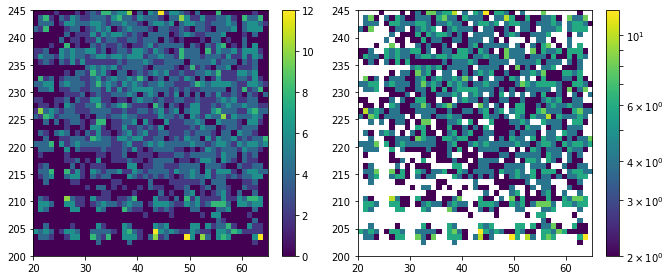

In [62]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(Row_ToA0_file1, Col_ToA0_file1, bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(Row_ToA0_file1, Col_ToA0_file1, bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

In [63]:
#define tmin, tmax
tStep = tMax0-tMin0;
tMin1 = tMax0
tMax1 = tMin1 + tStep;

# ToA_df1 = grid_df1.drop(grid_df1[(grid_df1['#ToA'] > tMin1) & (grid_df1['#ToA'] < tMax1)].index)

# print(ToA_df1.shape, type(ToA_df1.iloc[0,0]), type(ToA_df1.iloc[1,1]), time.ctime())
# print(ToA_df1.iloc[:3])
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS ToA1_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO ToA1_table_file1 SELECT * FROM grid_table_file1 WHERE [#ToA] BETWEEN (?) AND (?)", (tMin1, tMax1))
db.commit()
c.execute('SELECT * FROM ToA1_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'float'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(13929190, 232, 50, 999137339.0625, 250, 250, None)
 
(13929191, 241, 50, 999137700, 525, 525, None)
Thu Aug 20 17:45:24 2020
(13929192, 209, 61, 999137753.125, 525, 525, None)
Thu Aug 20 17:45:24 2020
(13929193, 220, 26, 999138095.3125, 400, 400, None)
Thu Aug 20 17:45:24 2020
(13929194, 203, 28, 999138273.4375, 175, 175, None)
Thu Aug 20 17:45:24 2020
(13929195, 230, 27, 999138478.125, 600, 600, None)
Thu Aug 20 17:45:24 2020
Thu Aug 20 17:45:24 2020


In [64]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()

c.execute("SELECT * FROM ToA1_table_file1")
Row_ToA1_file1 = np.array([row[2] for row in c])
print(len(Row_ToA1_file1))
c.execute("SELECT * FROM ToA1_table_file1")
Col_ToA1_file1 = np.array([row[1] for row in c])
print(len(Col_ToA1_file1))
# for row in c:
#     Col_ToA1_file1.append(row[1])
#     Row_ToA1_file1.append(row[2])
c.close()
db.close()
print(Row_ToA1_file1[0], Row_ToA1_file1[1], Row_ToA1_file1[2])
print(Col_ToA1_file1[0], Col_ToA1_file1[1], Col_ToA1_file1[2])

3104
3104
47 50 30
121 230 99


NameError: name 'Row_ToA1_file1' is not defined

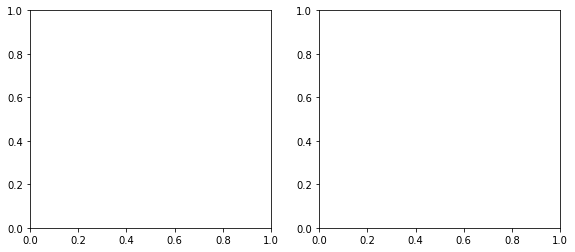

In [55]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(Row_ToA1_file1, Col_ToA1_file1, bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(Row_ToA1_file1, Col_ToA1_file1, bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

In [66]:
#define tmin, tmax
tMin2 = tMax1
tMax2 = tMin2 + tStep;

# ToA_df2 = grid_df1.drop(grid_df1[(grid_df1['#ToA'] > tMin2) & (grid_df1['#ToA'] < tMax2)].index)

# print(ToA_df2.shape, type(ToA_df2.iloc[0,0]), type(ToA_df2.iloc[1,1]), time.ctime())
# print(ToA_df2.iloc[:3])
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM grid_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS ToA2_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO ToA2_table_file1 SELECT * FROM grid_table_file1 WHERE [#ToA] BETWEEN (?) AND (?)", (tMin2, tMax2))
db.commit()
c.execute('SELECT * FROM ToA2_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

<class 'int'> <class 'int'> <class 'int'> <class 'float'>
<class 'int'> <class 'int'> <class 'NoneType'>
 
(13930810, 242, 21, 999250978.125, 3550, 3550, None)
 
(13930811, 203, 22, 999251300, 3150, 3150, None)
Thu Aug 20 17:47:22 2020
(13930812, 225, 45, 999251304.6875, 2800, 2800, None)
Thu Aug 20 17:47:22 2020
(13930813, 226, 21, 999251348.4375, 600, 600, None)
Thu Aug 20 17:47:22 2020
(13930814, 236, 26, 999251934.375, 2125, 2125, None)
Thu Aug 20 17:47:22 2020
(13930815, 209, 37, 999252040.625, 4775, 4775, None)
Thu Aug 20 17:47:22 2020
Thu Aug 20 17:47:22 2020


In [67]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()

c.execute("SELECT * FROM ToA2_table_file1")
Row_ToA2_file1 = np.array([row[2] for row in c])
c.execute("SELECT * FROM ToA2_table_file1")
Col_ToA2_file1 = np.array([row[1] for row in c])
# for row in c:
#     Col_ToA2_file1.append(row[1])
#     Row_ToA2_file1.append(row[2])
c.close()
db.close()

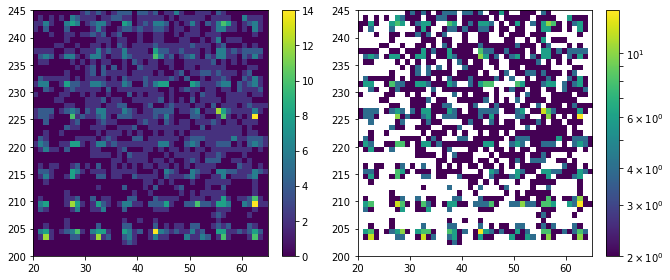

In [72]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(Row_ToA2_file1, Col_ToA2_file1, bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(Row_ToA2_file1, Col_ToA2_file1, bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

In [5]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()


c.execute("SELECT * FROM C1R1_table_file1")
ToA_C1R1_file1 = np.array([row[3] for row in c])
# for row in c:
#     ToA_C1R1_file1.append(row[3])


c.execute("SELECT * FROM C4R3_table_file1")
ToA_C4R3_file1 = np.array([row[3] for row in c])
# for row in c:
#     ToA_C4R3_file1.append()

c.close()
db.close()

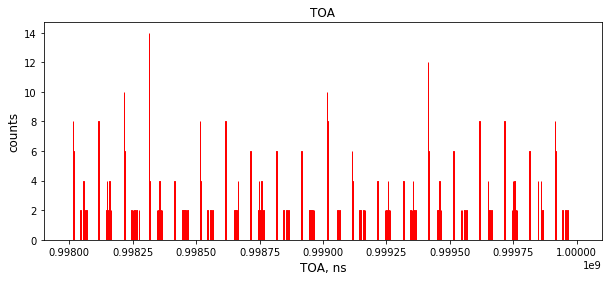

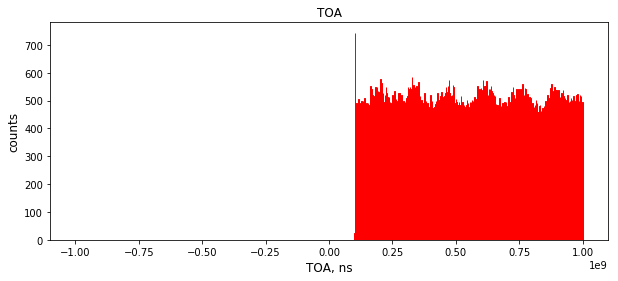

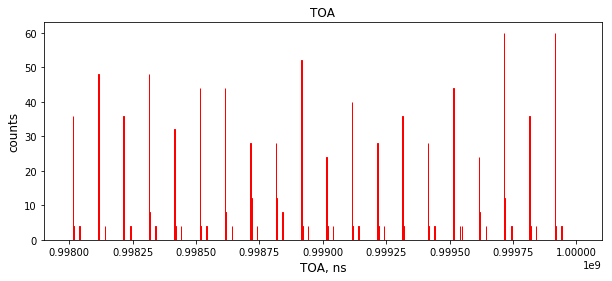

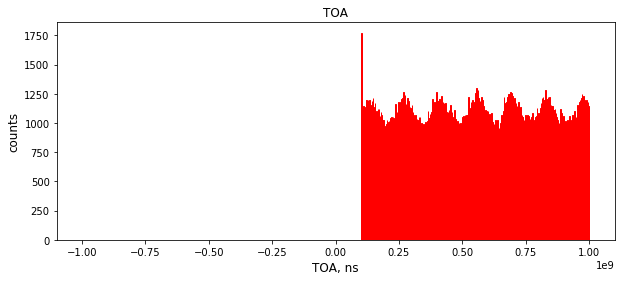

In [70]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ToA_C1R1_file1/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (0, 1e6))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(ToA_C1R1_file1/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ToA_C4R3_file1/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(ToA_C4R3_file1/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()


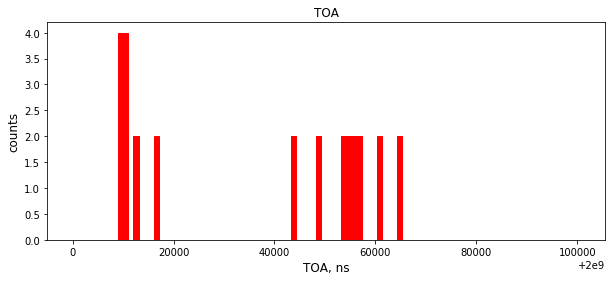

In [26]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ToA_C1R1_file1/4096.*25., bins = 100, color = 'r', ec = 'r', range = (2.0e9, 100500+2.0e9))
#plt.hist(ToA_C1R1_file1/4096.*25., bins = 1000, color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

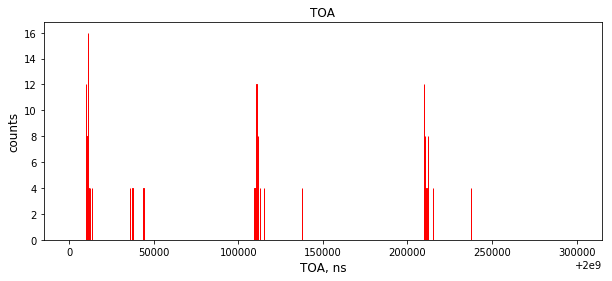

In [29]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ToA_C4R3_file1/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (2.0e9, 300000+2.0e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

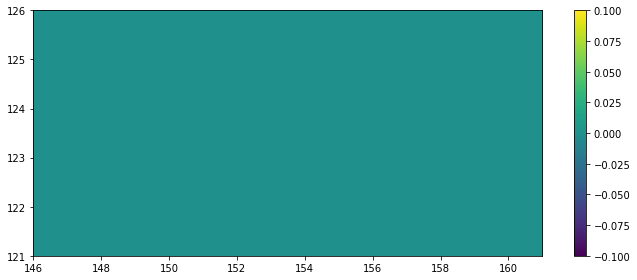

In [63]:
fig, ax0 = plt.subplots(ncols=1, figsize=(9.5, 4))

h = ax0.hist2d(Row_grid_file1, Col_grid_file1, bins = C3max-C1min, range = [(C1min, C3max), (R8min, R8max)])
fig.colorbar(h[3], ax = ax0)

fig.tight_layout()
plt.show()

In [ ]:
# Create toa plots for combined table of three spots
# create toa toa plots for specific range, then extract corresponding data for the three spots in each period and plot2Dhist
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()


c.execute("SELECT * FROM C1R1_table_file1")
ToA_C1R8_file1 = np.array([row[3] for row in c])
# for row in c:
#     ToA_C1R1_file1.append(row[3])


c.execute("SELECT * FROM C2R8_table_file1")
ToA_C2R8_file1 = np.array([row[3] for row in c])
# for row in c:
#     ToA_C4R3_file1.append()

c.execute("SELECT * FROM C3R8_table_file1")
ToA_C3R8_file1 = np.array([row[3] for row in c])

c.close()
db.close()

In [ ]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ToA_C1R8_file1/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (0, 1e6))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(ToA_C1R8_file1/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ToA_C2R8_file1/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(ToA_C2R8_file1/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(ToA_C3R8_file1/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (0, 1e6))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(ToA_C3R8_file1/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

In [ ]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("CREATE TABLE IF NOT EXISTS C123_R8_table_file1 AS SELECT* FROM row8_table_file1 WHERE 1=2")
db.commit()
c.execute("INSERT INTO C123_R8_table_file1 SELECT * FROM row8_table_file1 WHERE [#Row] BETWEEN (?) AND (?)", (C1min, C3max))
db.commit()
c.close()
db.close()

In [ ]:
#define tmin, tmax
tMin0 = 0.9990e9
tMax0 = 0.999125e9    

db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
# ToA_df0 = grid_df1.drop(grid_df1[(grid_df1['#ToA'] > tMin0) & (grid_df1['#ToA'] < tMax0)].index)

# print(ToA_df0.shape, type(ToA_df0.iloc[0,0]), type(ToA_df0.iloc[1,1]), time.ctime())
# print(ToA_df0.iloc[:3])

c.execute("SELECT * FROM C123_R8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C123_R8_ToA0_table_file1 AS SELECT * FROM grid_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C123_R8_ToA0_table_file1 SELECT * FROM C123_R8_table_file1 WHERE [#ToA] BETWEEN (?) AND (?)", (tMin0, tMax0))
db.commit()
c.execute('SELECT * FROM C123_R8_ToA0_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

In [ ]:
#define tmin, tmax
tStep = tMax0-tMin0;
tMin1 = tMax0
tMax1 = tMin1 + tStep;

# ToA_df1 = grid_df1.drop(grid_df1[(grid_df1['#ToA'] > tMin1) & (grid_df1['#ToA'] < tMax1)].index)

# print(ToA_df1.shape, type(ToA_df1.iloc[0,0]), type(ToA_df1.iloc[1,1]), time.ctime())
# print(ToA_df1.iloc[:3])
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM C123_R8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C123_R8_ToA1_table_file1 AS SELECT * FROM C123_R8_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C123_R8_ToA1_table_file1 SELECT * FROM C123_R8_table_file1 WHERE [#ToA] BETWEEN (?) AND (?)", (tMin1, tMax1))
db.commit()
c.execute('SELECT * FROM C123_R8_ToA1_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

In [ ]:
#define tmin, tmax
tMin2 = tMax1
tMax2 = tMin2 + tStep;

# ToA_df2 = grid_df1.drop(grid_df1[(grid_df1['#ToA'] > tMin2) & (grid_df1['#ToA'] < tMax2)].index)

# print(ToA_df2.shape, type(ToA_df2.iloc[0,0]), type(ToA_df2.iloc[1,1]), time.ctime())
# print(ToA_df2.iloc[:3])
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()
c.execute("SELECT * FROM C123_R8_table_file1")
c.execute("""CREATE TABLE IF NOT EXISTS C123_R8_ToA2_table_file1 AS SELECT * FROM C123_R8_table_file1 WHERE 1=2""")
db.commit()
c.execute("INSERT INTO C123_R8_ToA2_table_file1 SELECT * FROM C123_R8_table_file1 WHERE [#ToA] BETWEEN (?) AND (?)", (tMin2, tMax2))
db.commit()
c.execute('SELECT * FROM C123_R8_ToA2_table_file1')

print(type(c.fetchone()[0]),type(c.fetchone()[1]),type(c.fetchone()[2]),type(c.fetchone()[3]))
print(type(c.fetchone()[4]),type(c.fetchone()[5]),type(c.fetchone()[6]))
print(" ")
print(c.fetchone())
print(" ")

for row in c.fetchmany(5):
    print(row)
    print (time.ctime())
print (time.ctime())
c.close()
db.close()

In [ ]:
db = sqlite3.connect("AOM.sqlite")
c = db.cursor()

c.execute("SELECT * FROM C123_R8_ToA0_table_file1")
Row_C123_R8_ToA0_file1 = np.array([row[2] for row in c])
c.execute("SELECT * FROM C123_R8_ToA0_table_file1")
Col_C123_R8_ToA0_file1 = np.array([row[1] for row in c])
print(len(Row_C123_R8_ToA0_file1))
print(len(Col_C123_R8_ToA0_file1))

c.execute("SELECT * FROM C123_R8_ToA1_table_file1")
Row_C123_R8_ToA1_file1 = np.array([row[2] for row in c])
print(len(Row_ToA1_file1))
c.execute("SELECT * FROM C123_R8_ToA1_table_file1")
Col_C123_R8_ToA1_file1 = np.array([row[1] for row in c])
print(len(Row_C123_R8_ToA1_file1))
print(len(Col_C123_R8_ToA1_file1))


c.execute("SELECT * FROM C123_R8_ToA2_table_file1")
Row_C123_R8_ToA2_file1 = np.array([row[2] for row in c])
c.execute("SELECT * FROM C123_R8_ToA2_table_file1")
Col_C123_R8_ToA2_file1 = np.array([row[1] for row in c])
print(len(Row_C123_R8_ToA2_file1))
print(len(Col_C123_R8_ToA2_file1))

c.close()
db.close()

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(Row_C123_R8_ToA0_file1, Col_C123_R8_ToA0_file1, bins = C3max-C1min, range = [(C3min, C1max), (R8min, R8max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(Row_C123_R8_ToA1_file1, Col_C123_R8_ToA1_file1, bins = C3max-C1min, range = [(C3min, C1max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(Row_C123_R8_ToA2_file1, Col_C123_R8_ToA2_file1, bins = C3max-C1min, range = [(C3min, C1max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

fig.tight_layout()
plt.show()